# Hepatic Cirrhosis Survival Prediction - Pau Prat Moreno
This repository contains the comprehensive report on the predictive modeling of hepatic cirrhosis survival, completed by Pau Prat Moreno as part of the Bachelor's degree in Artificial Intelligence at the Universitat Politècnica de Catalunya.



In [ ]:
"""# Uncomment to upgrade packages
%pip install --upgrade pip  --quiet
%pip install pandas  --upgrade --quiet
%pip install numpy  --upgrade --quiet
%pip install scipy  --upgrade --quiet
%pip install statsmodels  --upgrade --quiet
%pip install seaborn  --upgrade --quiet
%pip install scikit-learn==1.3.0
%pip install tqdm ipykernel matplotlib ipywidgets --upgrade --quiet   
%pip install plotly numpy==1.25 nbformat umap-learn
%pip install ucimlrepo
%pip install mlxtend
%pip install pydotplus
%pip install imbalanced-learn
%pip install yellowbrick
%load_ext autoreload
"""

Basic imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [2]:
from ucimlrepo import fetch_ucirepo 

# Necessary code to avoid SSL error
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

  
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  

# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.original 
y = cirrhosis_patient_survival_prediction.data.targets 
  
# Metadata 
print(cirrhosis_patient_survival_prediction.metadata) 
  
# Variable information
print(cirrhosis_patient_survival_prediction.variables) 

{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'title': 'Prognos

In [3]:
df = pd.DataFrame(X,  cirrhosis_patient_survival_prediction.original)


In [4]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [5]:
df.shape

(418, 20)

In [6]:
df.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin Cholesterol  Albumin Copper  Alk_Phos    SGOT  \
0     Y       14.5         261     2.60    156    1718.0  137.95   
1     N        1.1         302     4.14     54    7394.8  113.52   
2     S        1.4         176     3.48    210     516.0   96.10   
3     S        1.8         244     2.54     64    6121.8   60.63   
4     N        3.4         279     3.53    143     671.0  113.15   

  Tryglicerides Platelets  Prothrombin  Stage  
0           172       190         12.2    4.0  
1            88       221         10.6    3.0  
2            55       151         12.0    4.0  
3            92       183         10.3    4.0  
4            72       136         10.9    3.0

In [7]:
# Check which values has the target variable
y.value_counts()

Status
C         232
D         161
CL         25
Name: count, dtype: int64

We will use the variable located in column called 'Status' as target. It has three possible values, therefore it is a classification problem.

# 1. Analysis and preprocessing of data

In [8]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#### <span style="color:lightgreen">Statistical analysis of the variables independently. 
</span>

We are going to perform a basic inspection of the dataset, as we want ot observe:
* minimum and maximum values
* means and deviations
* find possible abnormal values (outliers)
* find possible missing values
* decide which variables are continuous & which are categorical
* for mixed types fo one of the following
  *  recode continuous to categorical
  *  recode categorical to continuous
  *  leave them as they are (method restricted & dummy cat. to cont. code)
* See histogram

In [9]:
df.describe()

ID       N_Days           Age   Bilirubin     Albumin  \
count  418.000000   418.000000    418.000000  418.000000  418.000000   
mean   209.500000  1917.782297  18533.351675    3.220813    3.497440   
std    120.810458  1104.672992   3815.845055    4.407506    0.424972   
min      1.000000    41.000000   9598.000000    0.300000    1.960000   
25%    105.250000  1092.750000  15644.500000    0.800000    3.242500   
50%    209.500000  1730.000000  18628.000000    1.400000    3.530000   
75%    313.750000  2613.500000  21272.500000    3.400000    3.770000   
max    418.000000  4795.000000  28650.000000   28.000000    4.640000   

           Alk_Phos        SGOT  Prothrombin       Stage  
count    312.000000  312.000000   416.000000  412.000000  
mean    1982.655769  122.556346    10.731731    3.024272  
std     2140.388824   56.699525     1.022000    0.882042  
min      289.000000   26.350000     9.000000    1.000000  
25%      871.500000   80.600000    10.000000    2.000000  
50%     1259.000000  114.700000    10.600000    3.000000  
75%     1980.000000  151.900000    11.100000    4.000000  
max    13862.400000  457.250000    18.000000    4.000000

We can observe that 'ID' is an unncessary feature in this dataset, so let's remove it as it doesn't give us any extra information.

In [10]:
df.drop(['ID'], axis=1, inplace=True)

#### Let's decide which variables are continuous and which are categorical

In order to see if a feature is categorical or numerical, let's see how many unique values it has. 
If some features have a high number of unique values, we will treat them as numerical, whereas if they have a low number of unique values we will treat them as categorical.

In [11]:
features = pd.DataFrame({
    'Feature': df.columns,
    'Type': [df[column].dtype for column in df.columns],
    'Unique values': [df[column].nunique() for column in df.columns]
})
features.sort_values(by='Unique values', ascending=True)

Feature     Type  Unique values
4             Sex   object              2
1          Status   object              3
2            Drug   object              3
5         Ascites   object              3
6    Hepatomegaly   object              3
7         Spiders   object              3
8           Edema   object              3
18          Stage  float64              4
17    Prothrombin  float64             48
9       Bilirubin  float64             98
15  Tryglicerides   object            147
11        Albumin  float64            154
12         Copper   object            159
14           SGOT  float64            179
10    Cholesterol   object            202
16      Platelets   object            244
13       Alk_Phos  float64            295
3             Age    int64            344
0          N_Days    int64            399

On the one side, we can see that 'Stage' feature appears to be numeric (float64 type), but in reality is categorical because it just has 4 unique values.

On the other side, there are some features that have been defined as categorical but I expected them to be numerical, such as 'Cholesterol', 'Copper', 'Triglycerides' or 'Platelets'. 

If we observe the 'Unique values' column, we can easily differentiate the categorical features from the numerical ones. 
Now, we can create a function that classifies features into numerical or categorical depending on the number of unique values they have. If that number is > 10, they are considered numerical, whereas if it is <= 10, they are defined as categorical.

In [12]:
def classify_features(df, threshold, target):
    numerical_features = []
    categorical_features = []
    
    for column in df.columns:
        if column != target:
            unique_values = df[column].nunique()
            if unique_values > threshold:
                numerical_features.append(column)
            else:
                categorical_features.append(column)
    
    return numerical_features, categorical_features

threshold = 10
target = 'Status'  # target variable

# Classify the features
numerical_features, categorical_features = classify_features(df, threshold, target)

print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)
print('*'*80)

print('Number of categorical variables: ', len(categorical_features))
print('*'*80)
print('Categorical Variables Column:',categorical_features)

Number of numerical variables:  11
********************************************************************************
Numerical Variables Column:  ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
********************************************************************************
Number of categorical variables:  7
********************************************************************************
Categorical Variables Column: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']


In order to visualize correctly their distribution, we need to transform these four features into numerical data

In [13]:
for feature in ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

#### Now let's visualize the distribution for each coninuous variable.

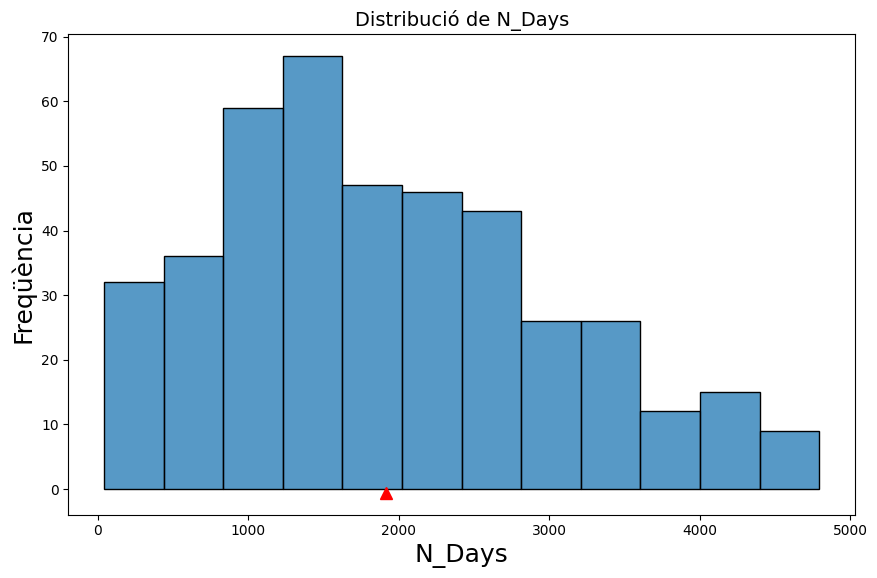

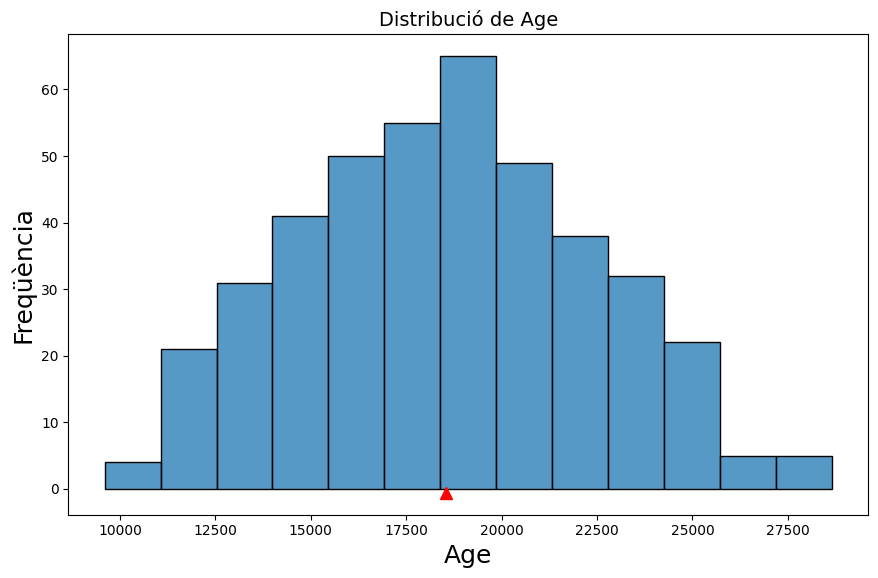

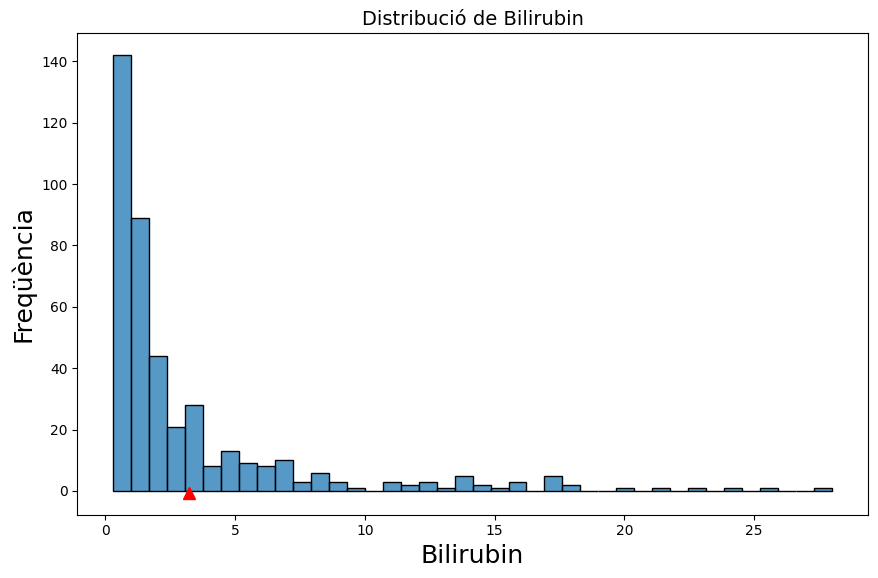

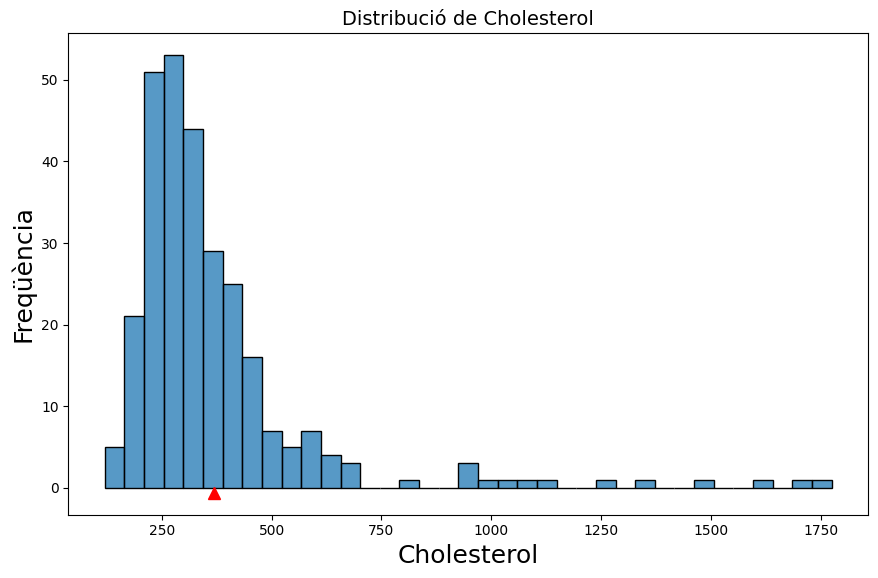

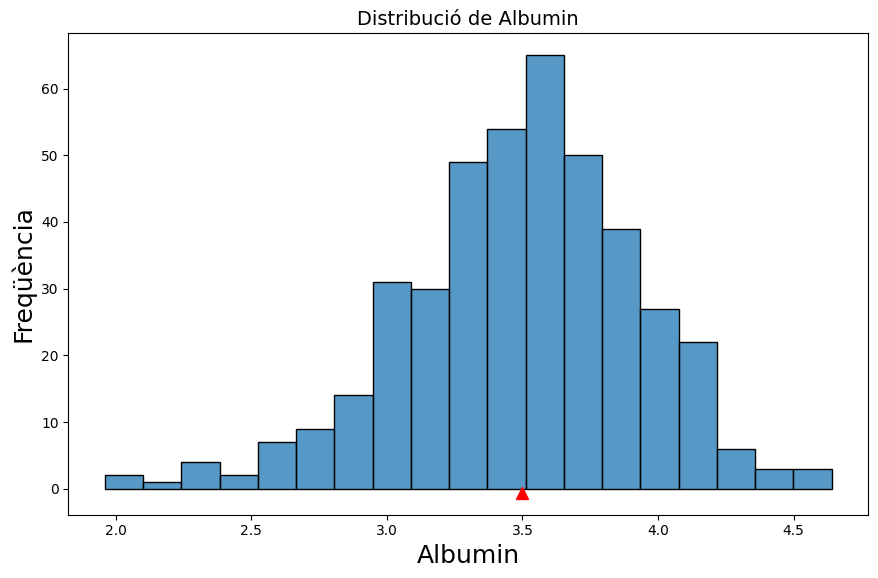

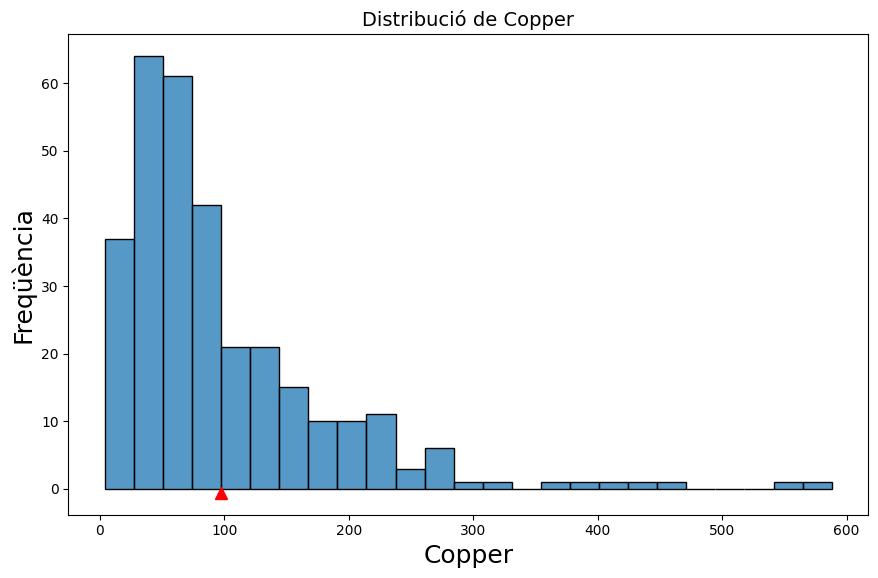

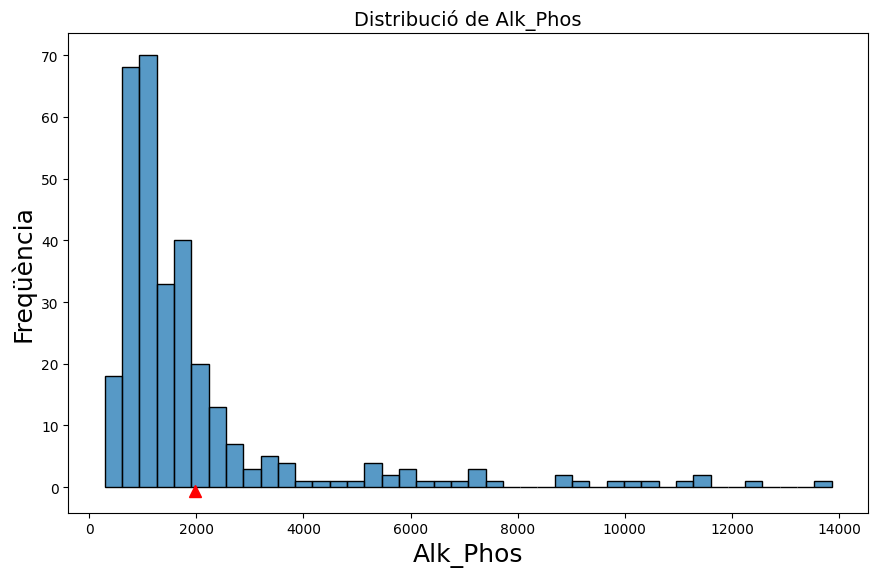

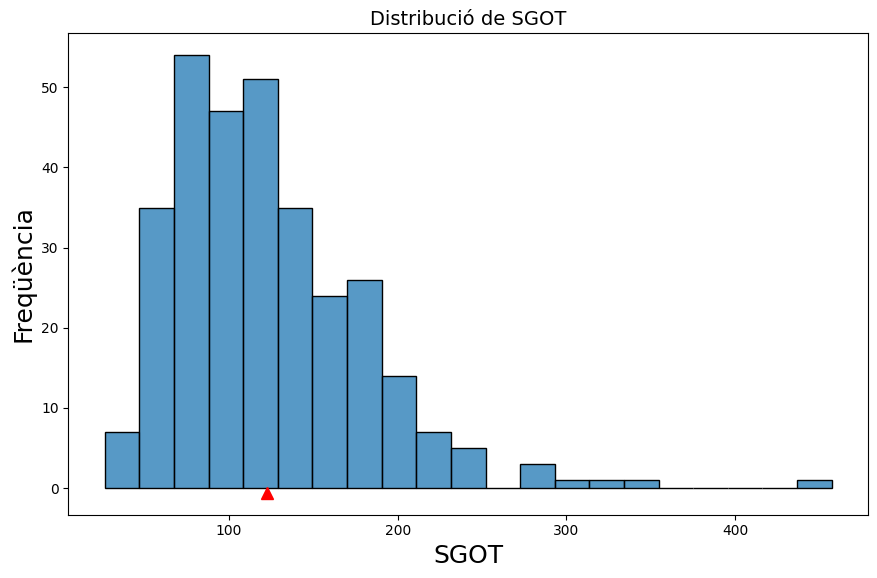

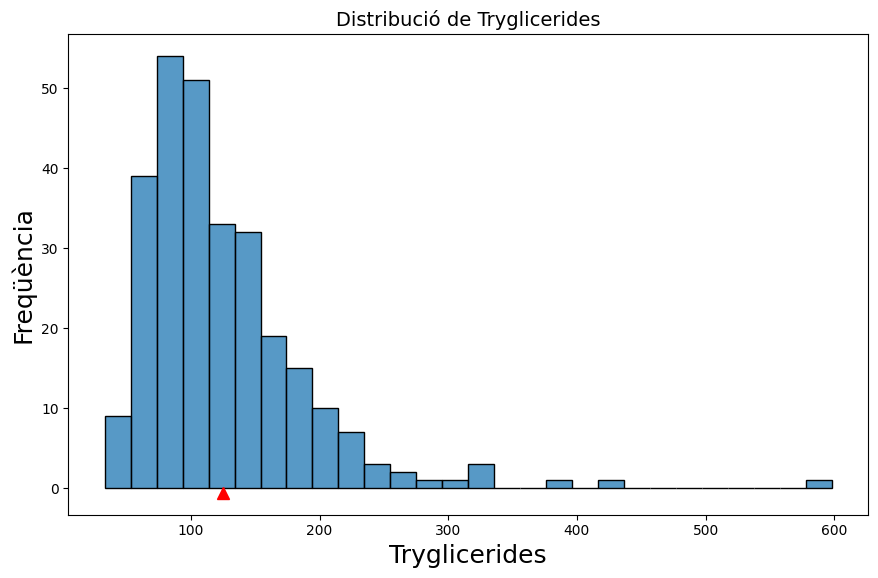

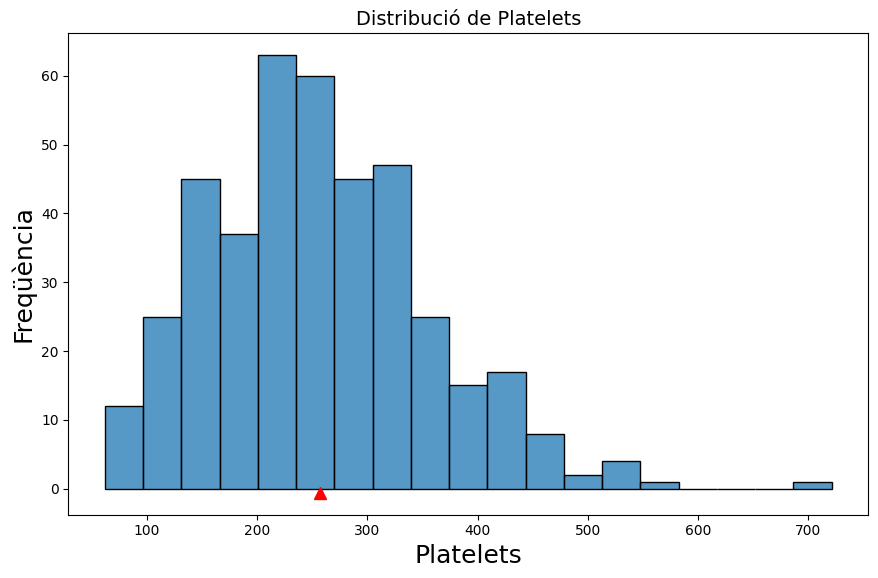

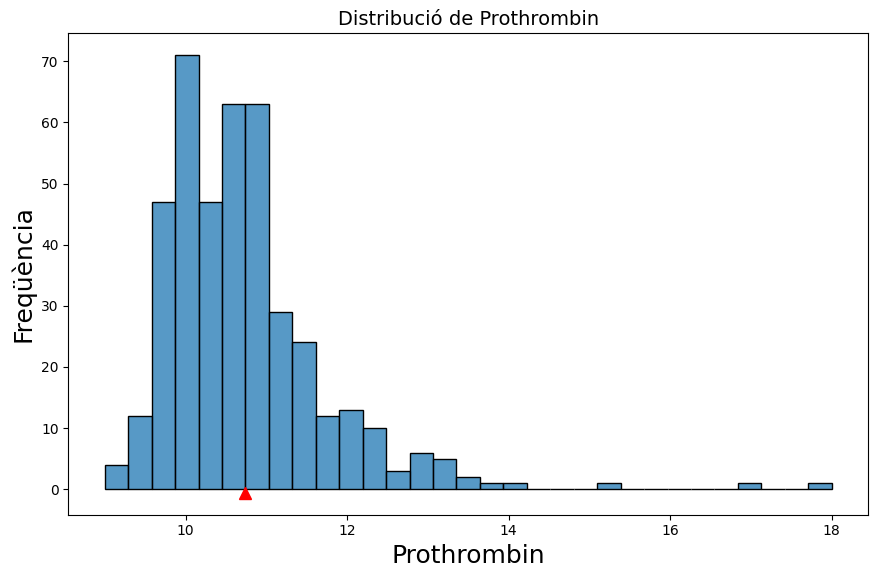

In [14]:
for feature in numerical_features:
    mean = df[feature].mean()
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.histplot(df[feature], kde=False, ax=ax, edgecolor="black")
    ax.plot([mean], [-0.6], marker='^', markersize=9, color="red")
    ax.set_title(f'Distribució de {feature}')
    ax.set_xlabel(feature, size=18)
    ax.set_ylabel("Freqüència", size=18)
    plt.tight_layout()
    #plt.savefig(f'./plots/distribution_num/{feature}_distribution.png')
    

#### <span style="color:lightgreen">Study of class balancing. 1 Figure (histogram with frequency per class). At this point, we decide whether to use any method for class balancing. Justify this decision and detail the consequences.</span>

##### Frequency histograms per class (without missings)

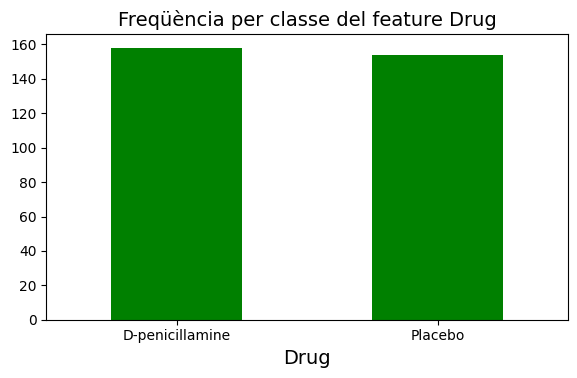

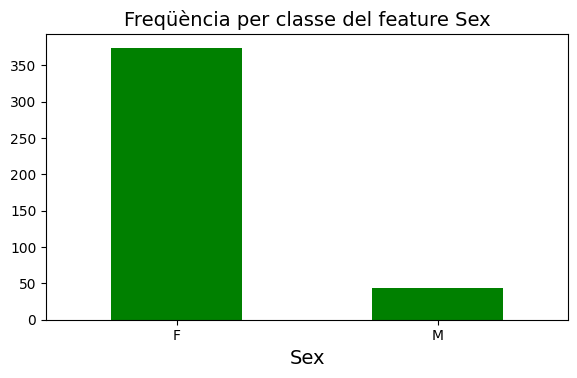

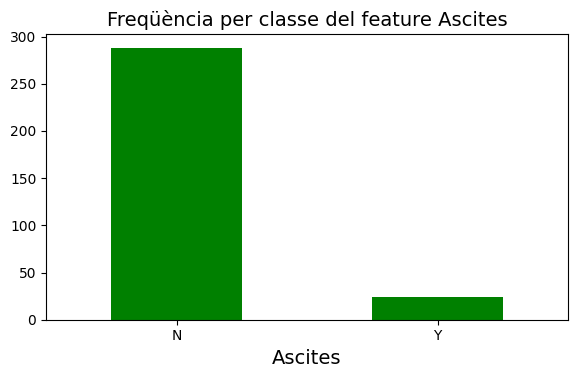

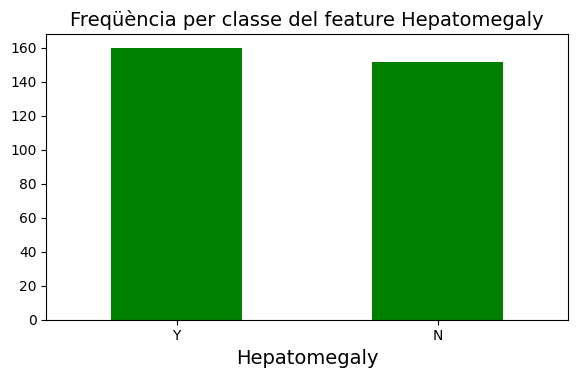

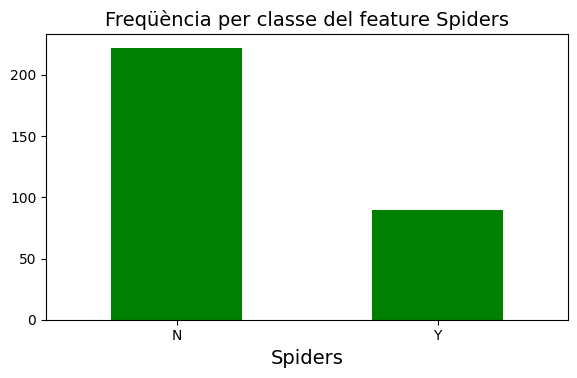

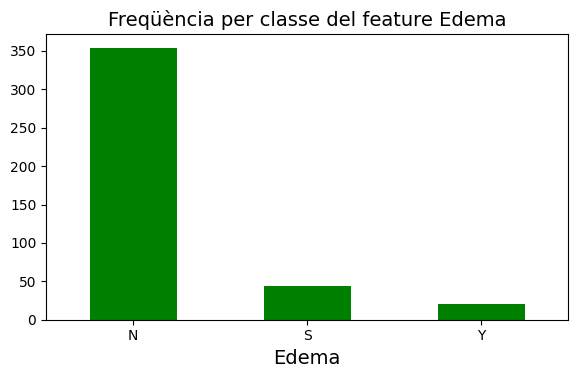

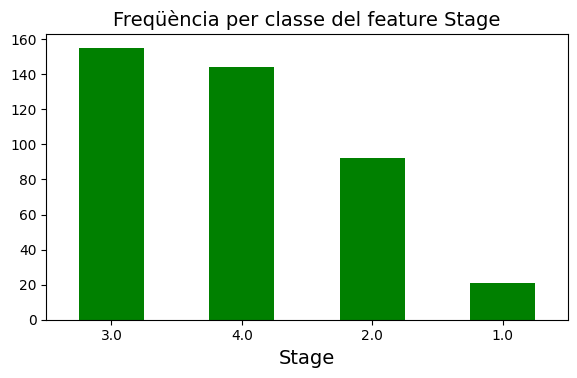

In [15]:
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    df[feature].replace('NaNN', np.nan).dropna().value_counts().plot(kind='bar', color='green')
    plt.title(f'Freqüència per classe del feature {feature}')
    plt.xticks(rotation='horizontal')  
    plt.tight_layout()
    #plt.savefig(f'./plots/frequency_cat/{feature}_frequency.png')


It's interesting to see that there are a lot more females than males, which leads to a high imbalance in the feature 'Sex'.

In [16]:
#Values for feature 'Sex'
df['Sex'].value_counts()

Sex
F    374
M     44
Name: count, dtype: int64

As we can see in the plots, we have imbalanced data, but we need to check if the target variable is balanced.



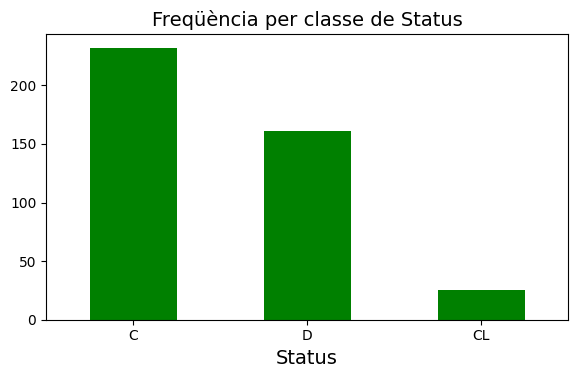

In [17]:
plt.figure(figsize=(6, 4))
df['Status'].replace('NaNN', np.nan).dropna().value_counts().plot(kind='bar', color='green')
plt.title(f'Freqüència per classe de Status')
plt.xticks(rotation='horizontal')  
plt.tight_layout()

As we observe, the target variable  is significantly imbalanced. This imbalance could potentially bias the predictive model towards the majority class, leading to inaccurate predictions for the minority class. 

Therefore, after partitioning the dataset , we will apply a balancing technique to the training set in order to balance the classes of this featurer, which will help to ensure that the model is not biased and can generalize well to unseen data.

#### <span style="color:lightgreen"> Missings. Identification and management proposal. Table (number of missings per variable). If imputation is performed, it should be done after data partitioning. </span>

In [18]:
for feature in df.columns:
    df[feature].replace('NaNN', np.nan, inplace=True)

In [19]:
def missing_data(data):
    total_missing = data.isna().sum().sort_values(ascending=False)
    percent_missing = round(100 * (data.isnull().sum() / len(data)), 2).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing (%)': percent_missing})
    return missing_data
missing_data(df)

Total Missing  Percent Missing (%)
Tryglicerides            136                32.54
Cholesterol              134                32.06
Copper                   108                25.84
Drug                     106                25.36
Ascites                  106                25.36
Hepatomegaly             106                25.36
Spiders                  106                25.36
SGOT                     106                25.36
Alk_Phos                 106                25.36
Platelets                 11                 2.63
Stage                      6                 1.44
Prothrombin                2                 0.48
N_Days                     0                 0.00
Albumin                    0                 0.00
Status                     0                 0.00
Edema                      0                 0.00
Sex                        0                 0.00
Age                        0                 0.00
Bilirubin                  0                 0.00

In [20]:
# Select rows that don't have any missing values
no_missing_rows = df.notna().all(axis=1)

# Count the number of rows that don't have any missing values
num_no_missing_rows = no_missing_rows.sum()

# Calculate the percentage of rows without missing values and round it to 2 decimal places
percentage_no_missing = round((num_no_missing_rows / len(df)) * 100, 2)

print(f'Rows without missings: {num_no_missing_rows} \nPercentage of rows without missings: {percentage_no_missing}%')

Rows without missings: 276 
Percentage of rows without missings: 66.03%


#### We will impute all the missing values!

##### (Justification of this is in the report)

#### <span style="color:lightgreen">  Outliers. Identification and management proposal, if necessary. 1 Figure per variable with outliers, showing the distribution with and without outliers. </span>

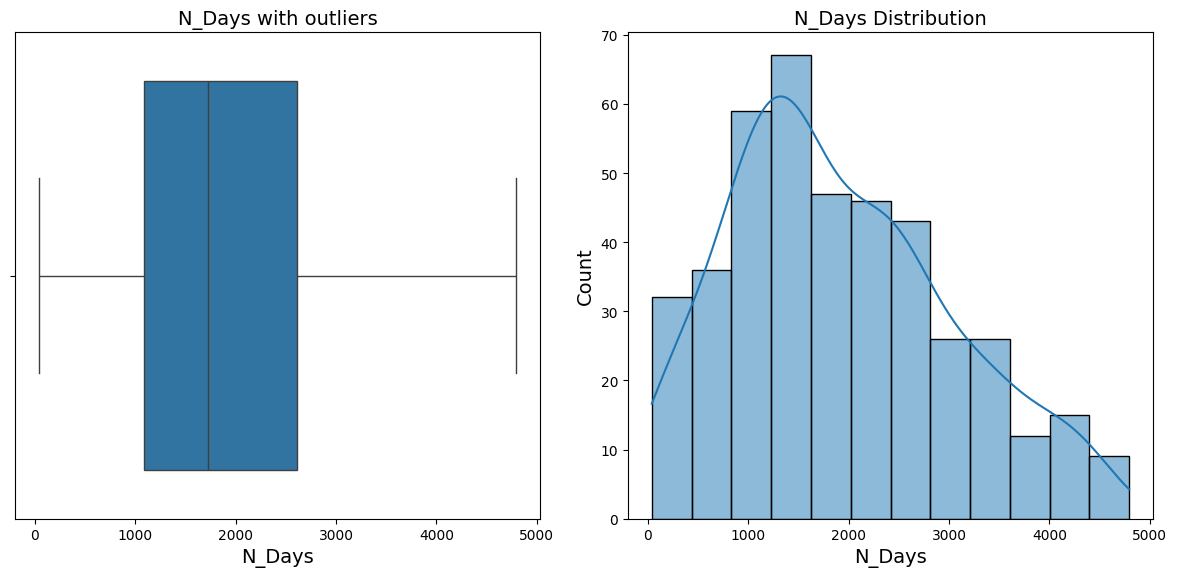

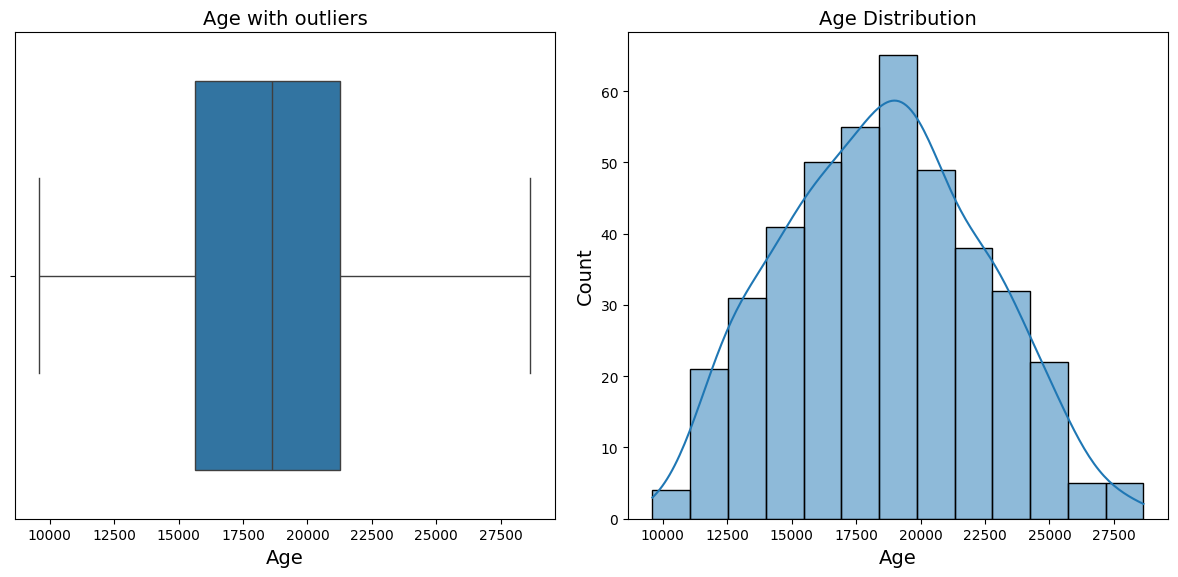

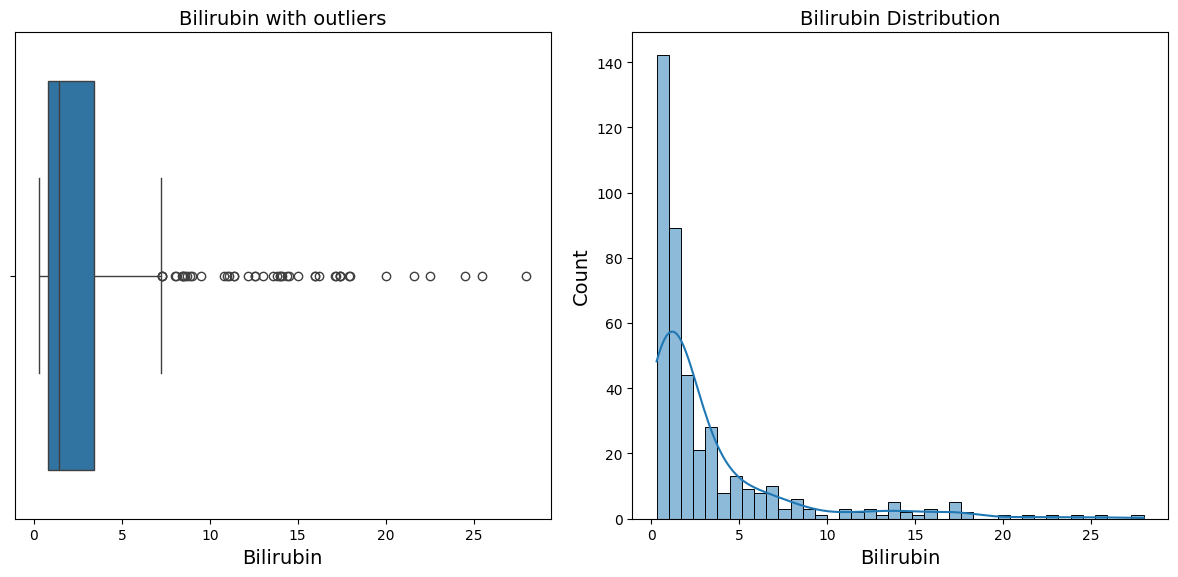

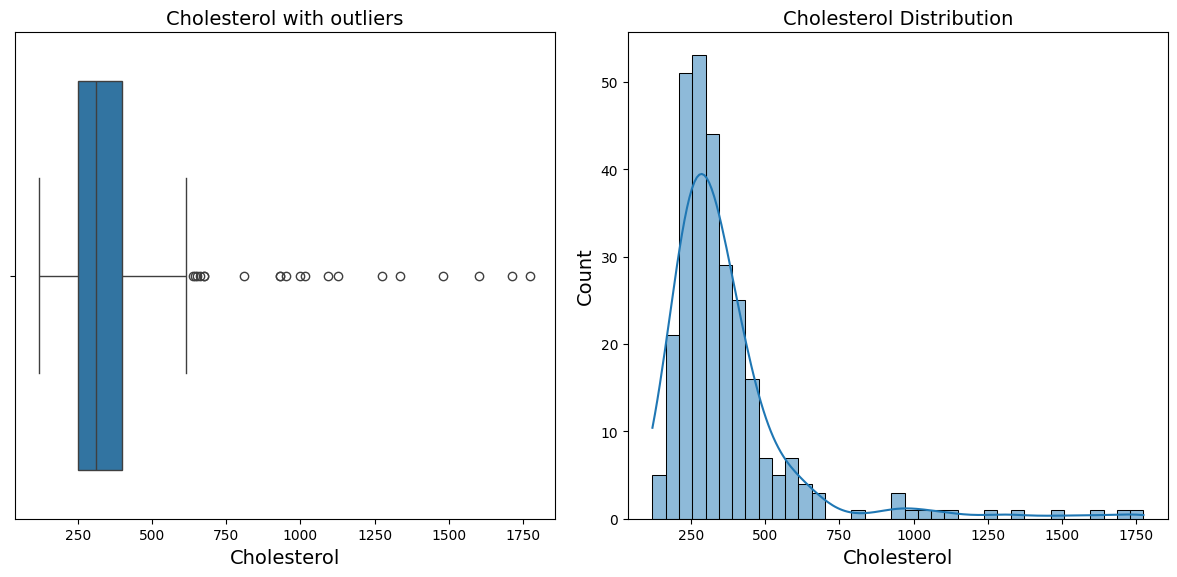

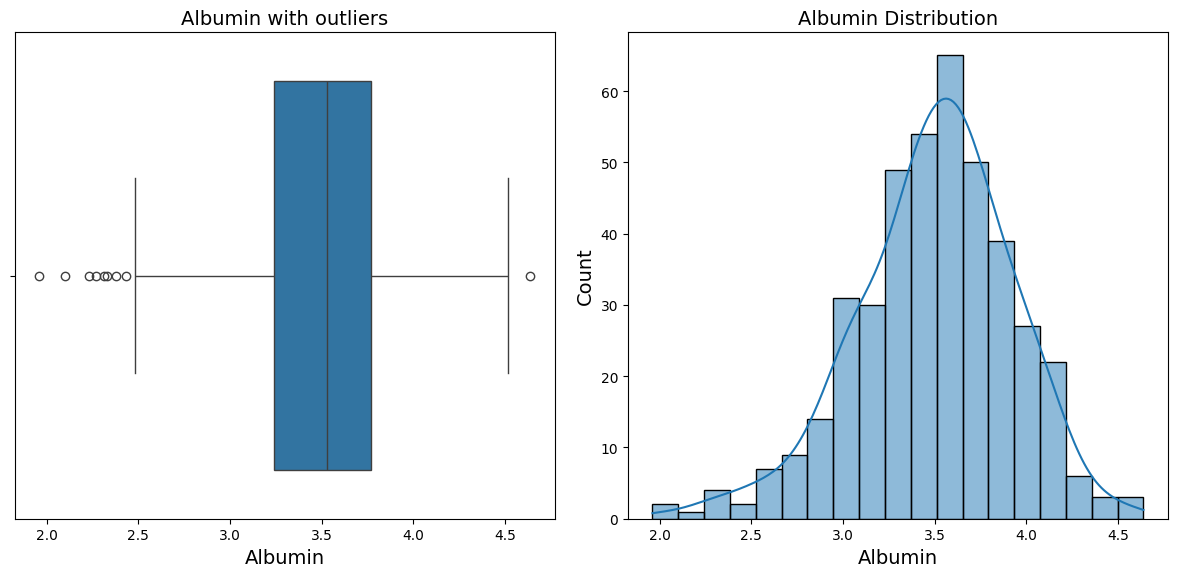

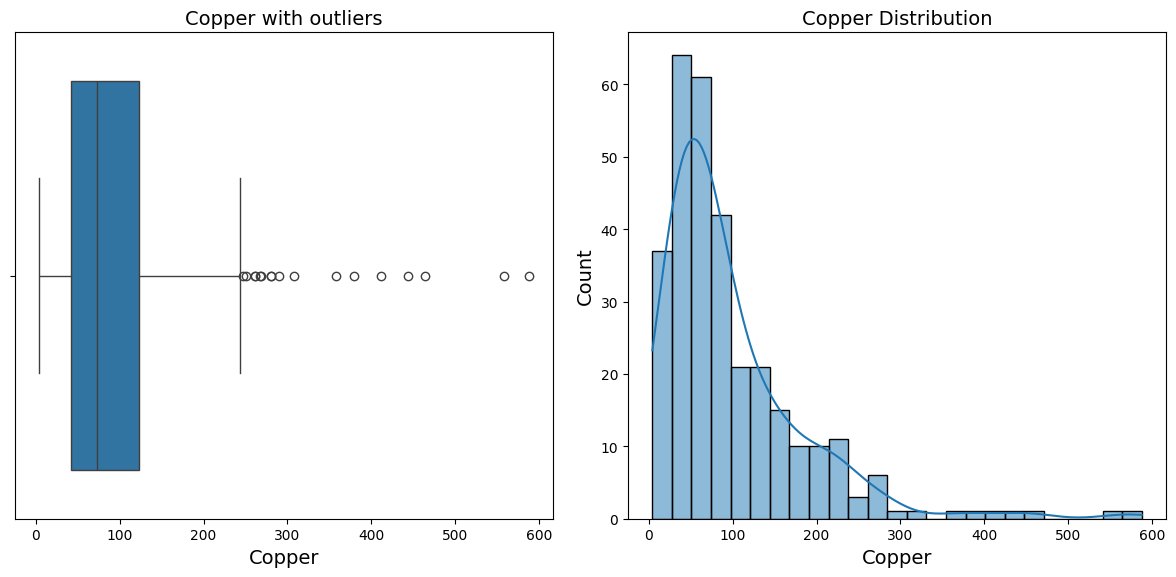

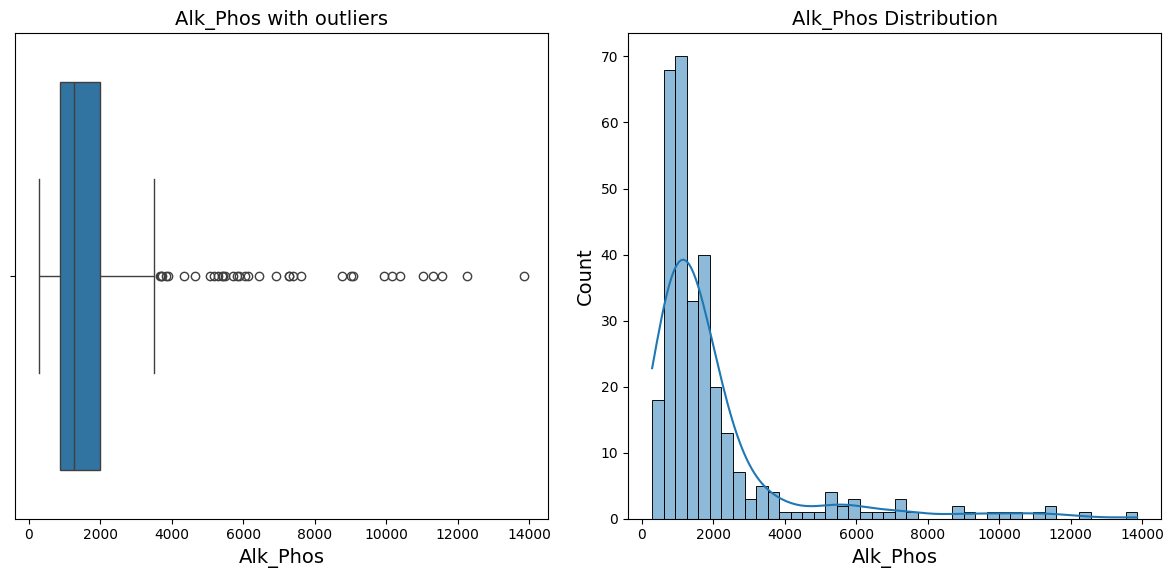

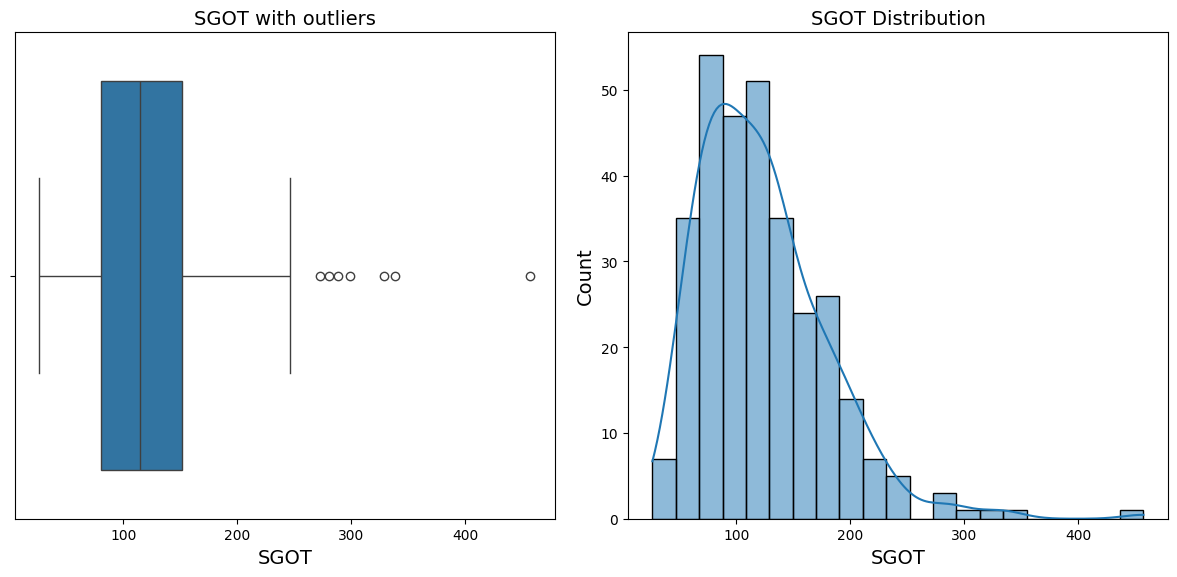

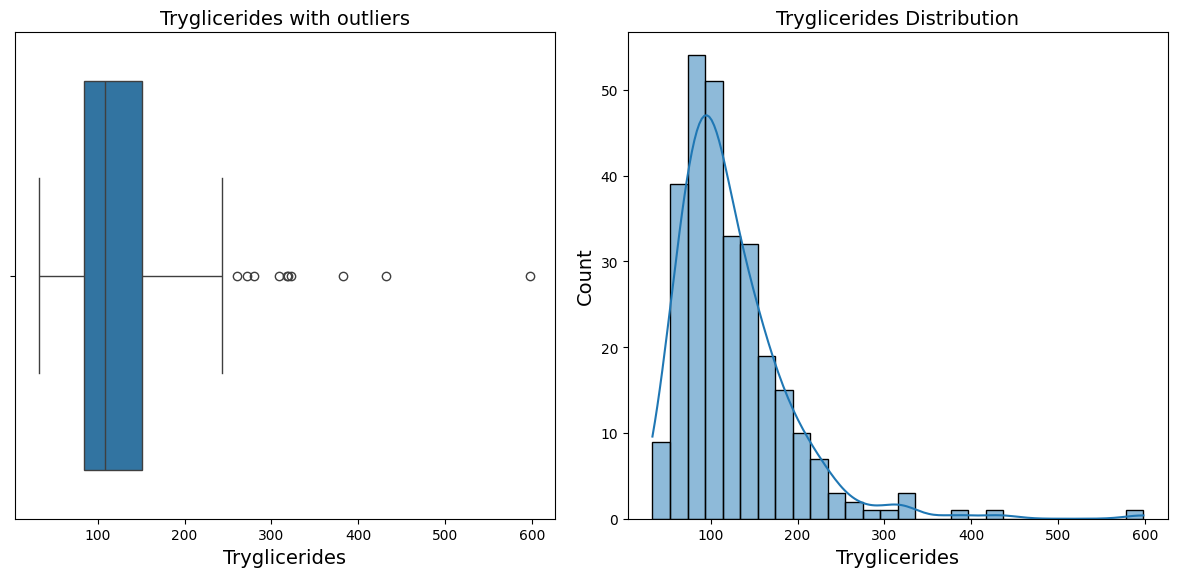

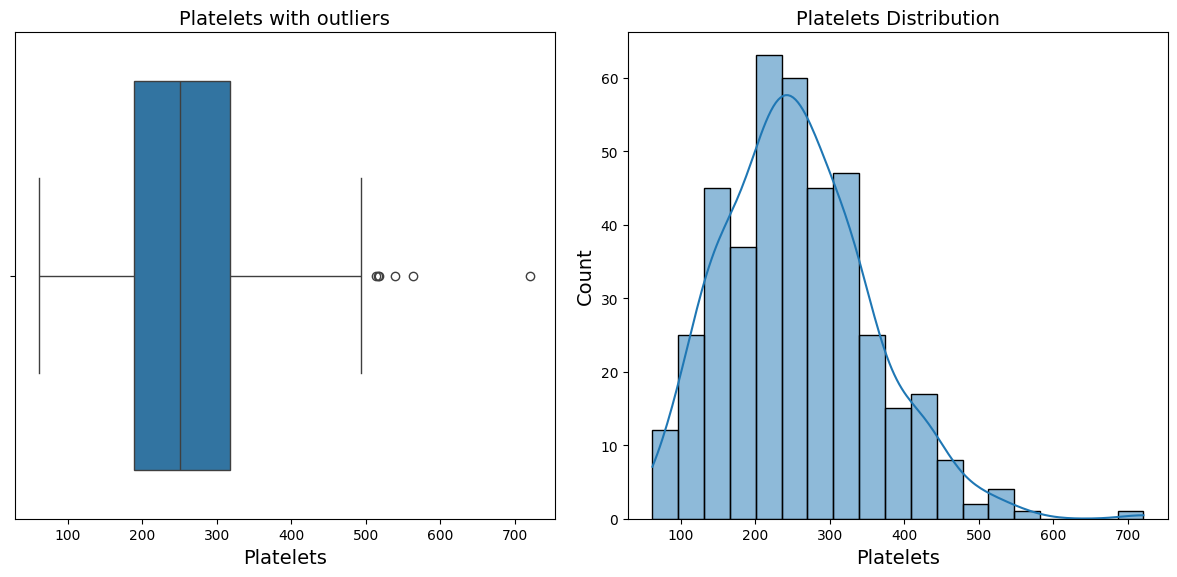

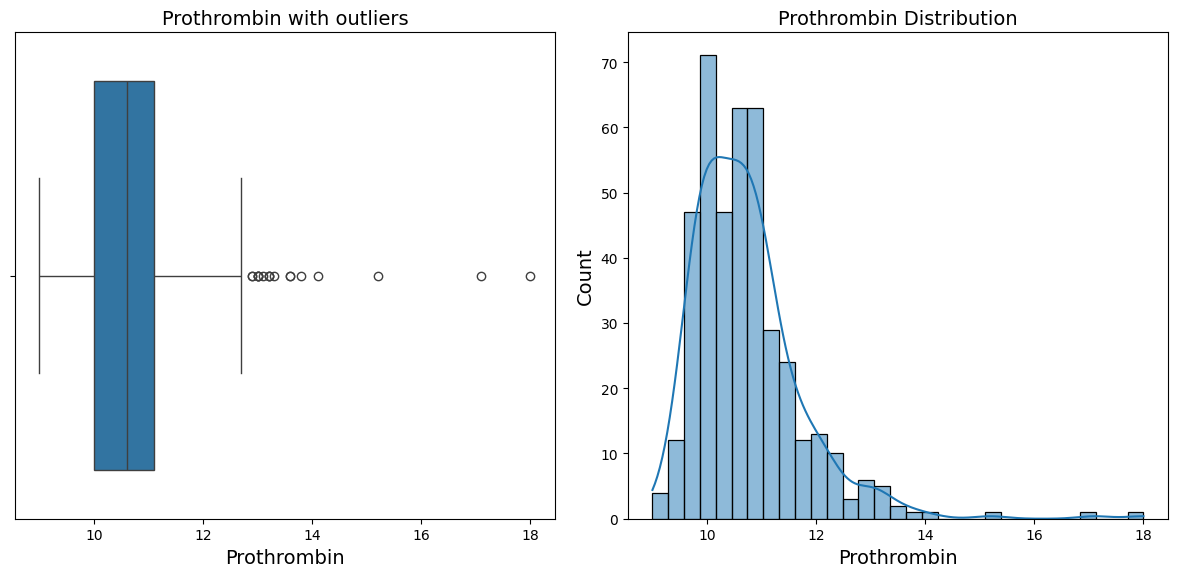

In [21]:
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot
    sns.boxplot(x=df[feature], ax=axes[0])
    axes[0].set_title(f'{feature} with outliers')

    # Plot distribution
    sns.histplot(data=df, x=feature, kde=True, ax=axes[1])
    axes[1].set_title(f'{feature} Distribution')

    plt.tight_layout()
    #fig.savefig(f'./plots/dist_with_outliers/{feature}_with_outliers.png')

We will define the outliers as: 
* The values smaller than Q1 - 1.5*IQR
* The values bigger than Q3 + 1.5*IQR


Therefore, all the values detected as outliers will be dropped from the dataset. This decision is justified in the report

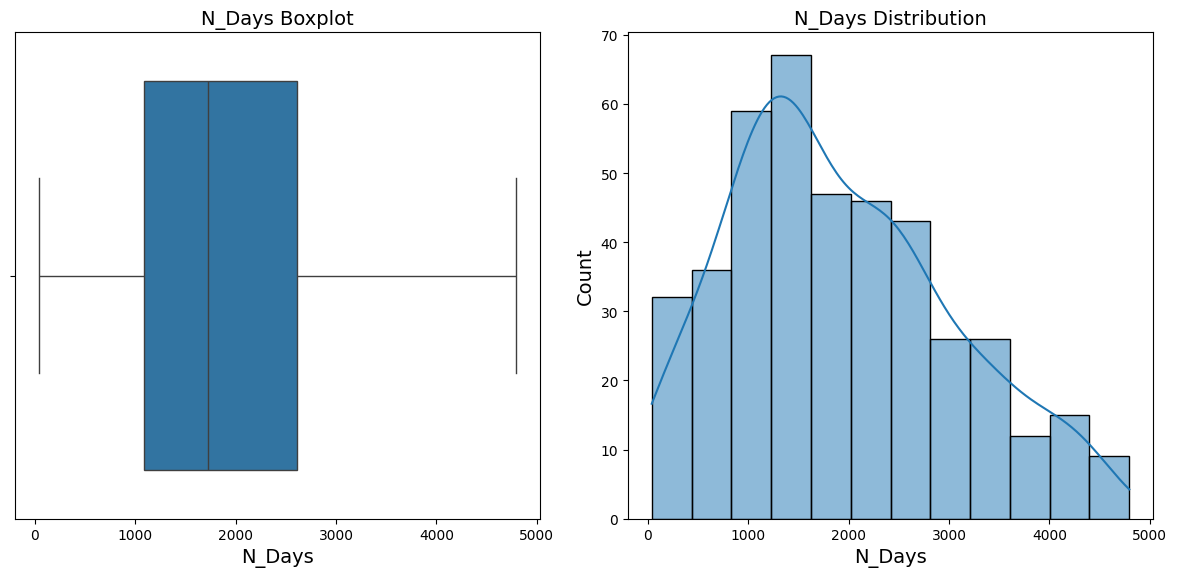

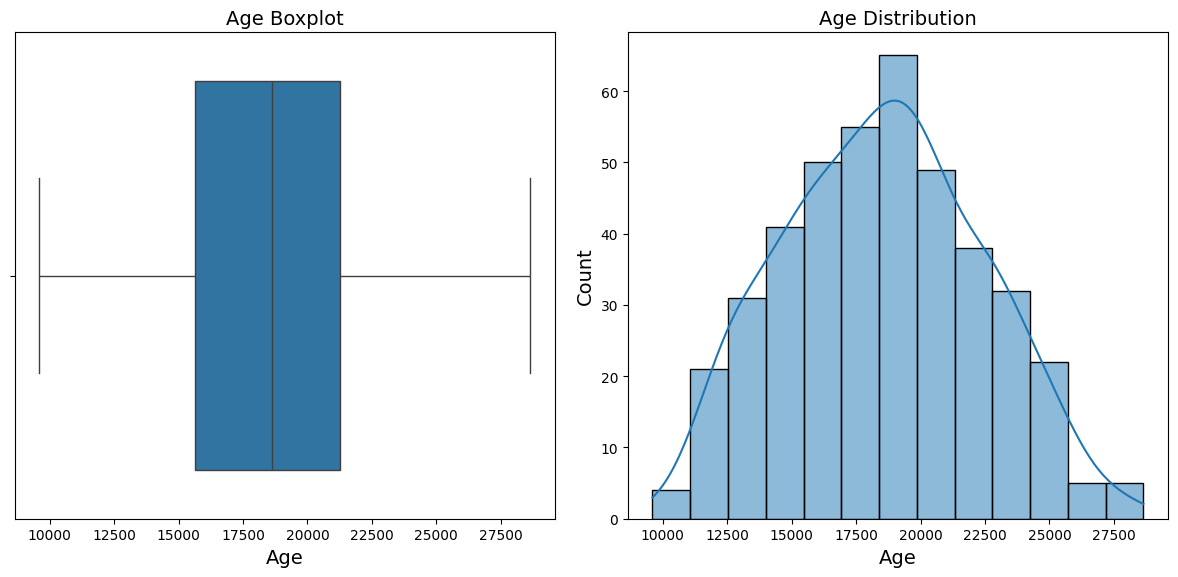

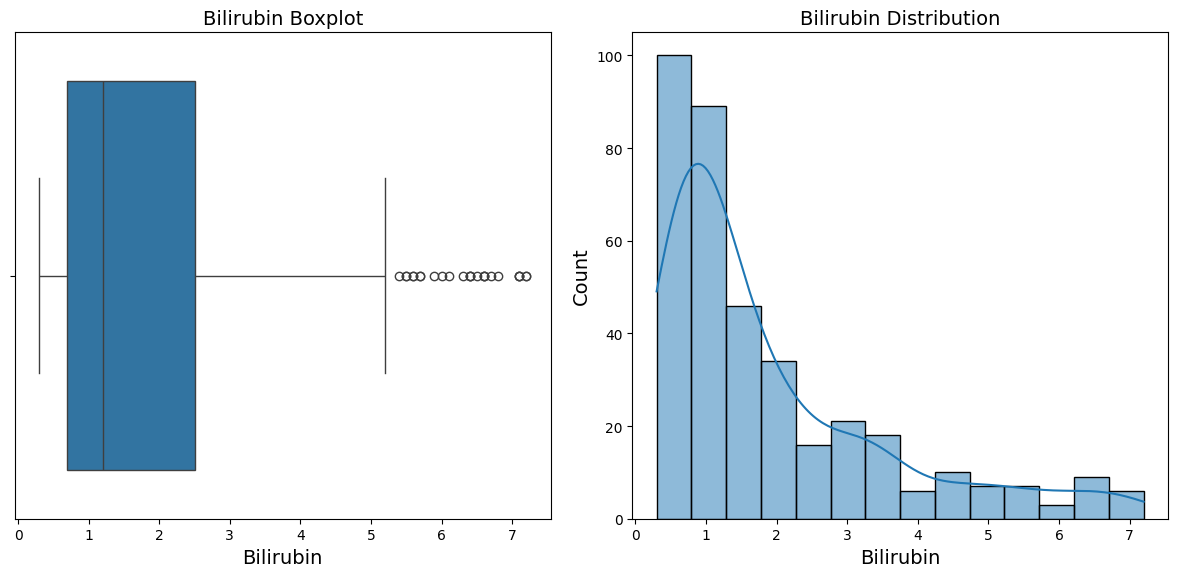

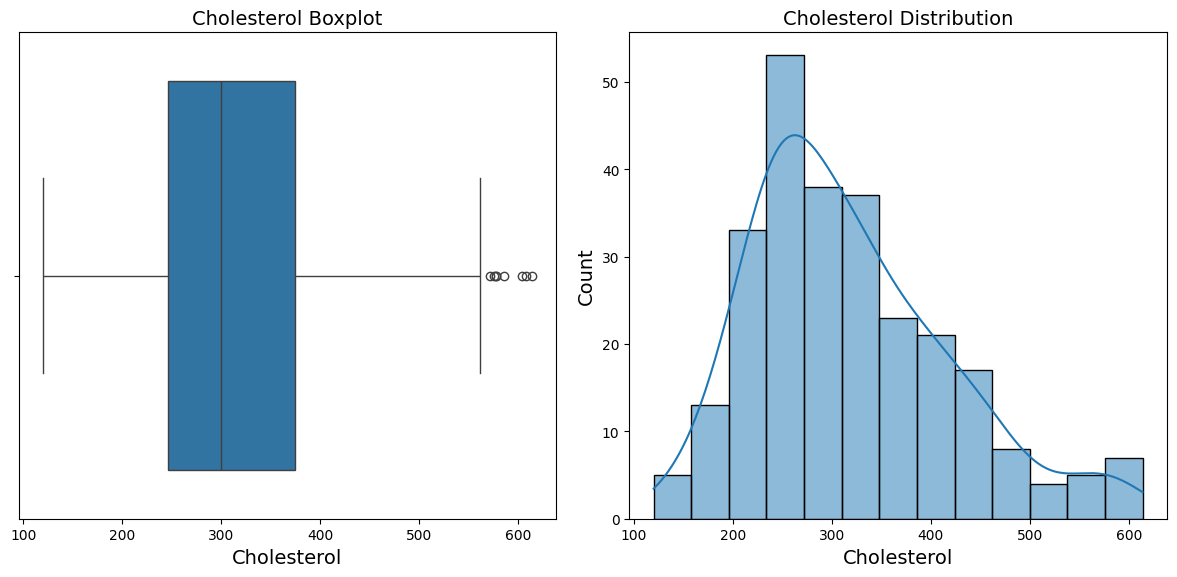

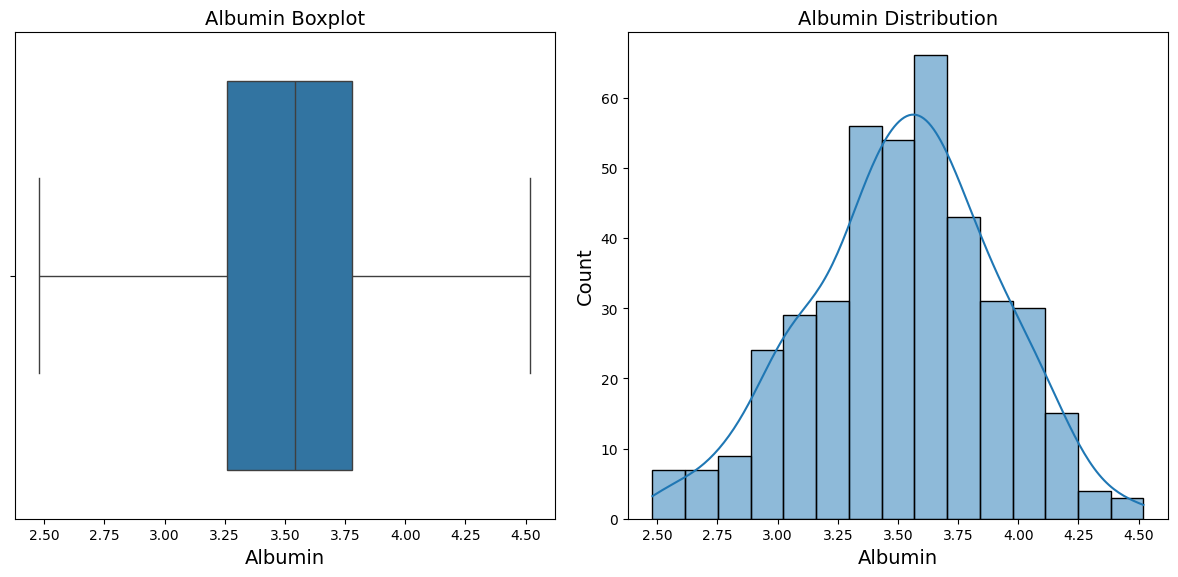

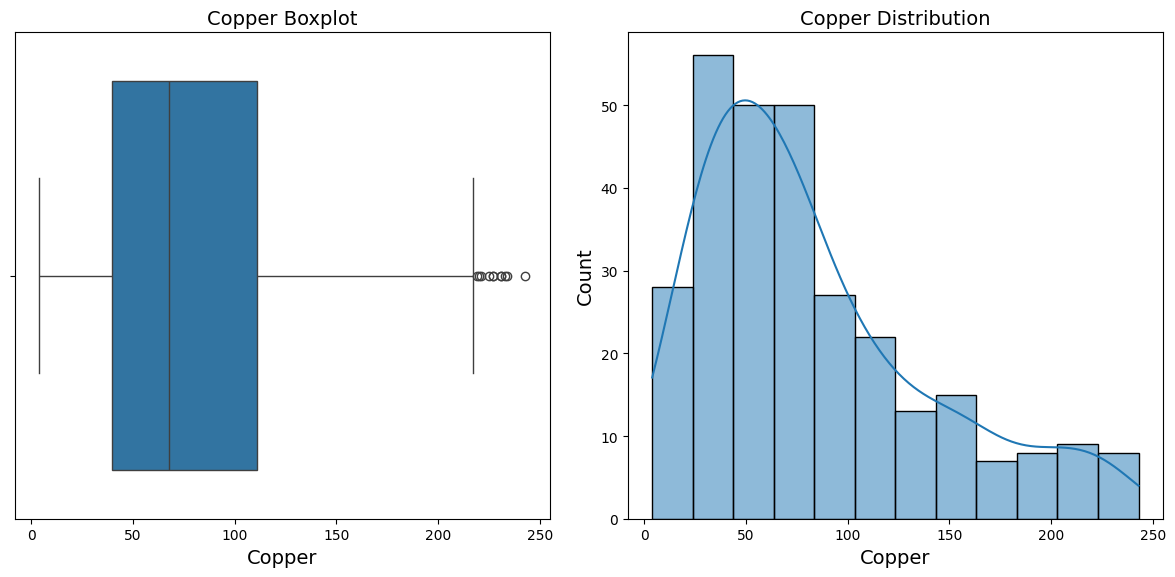

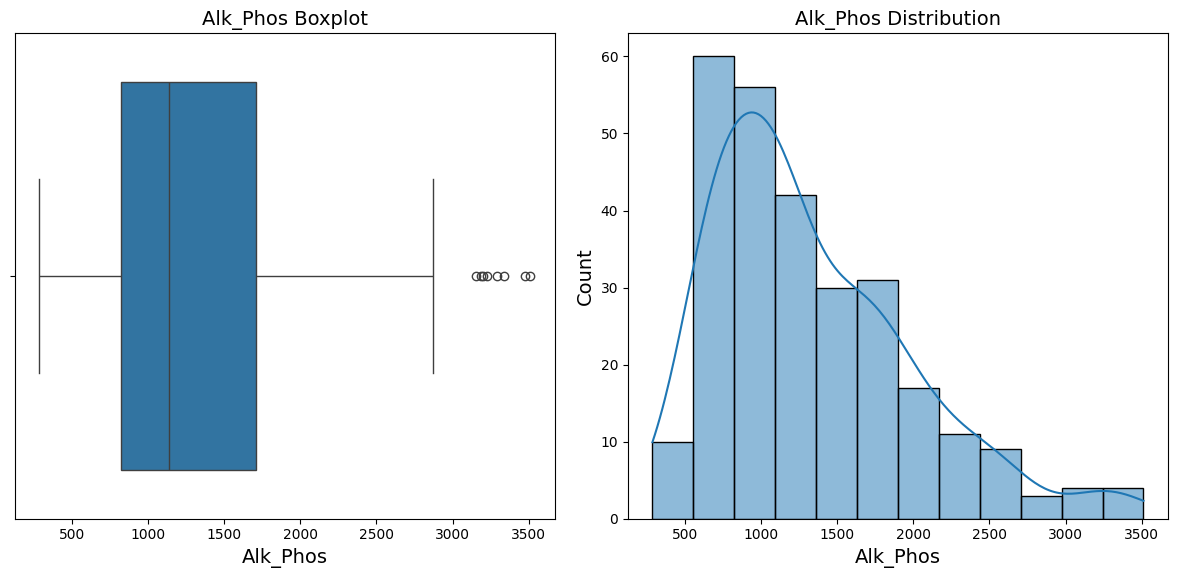

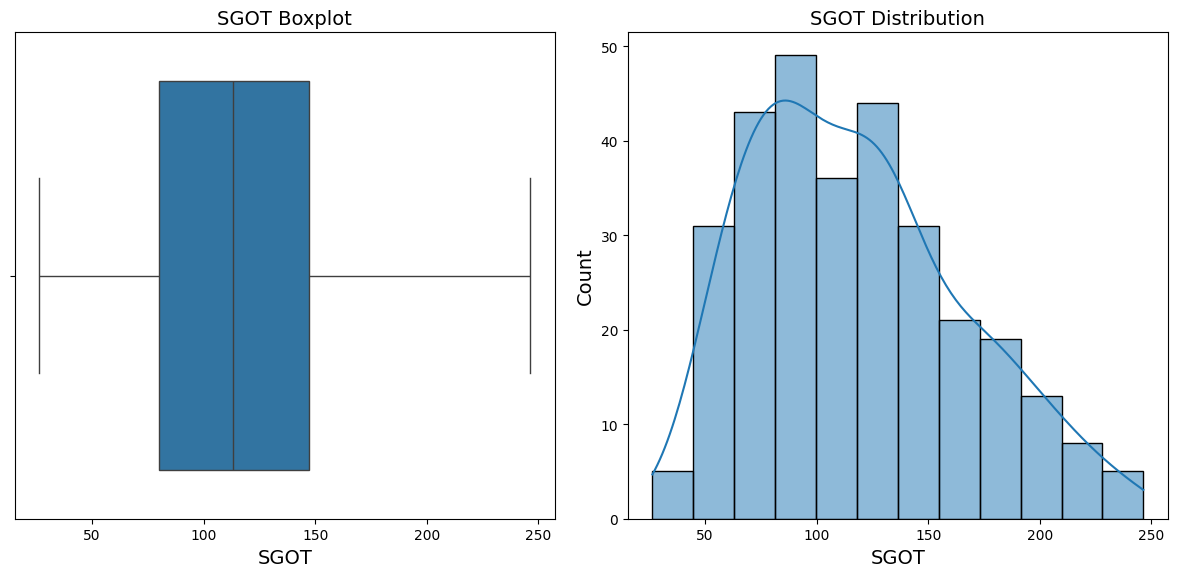

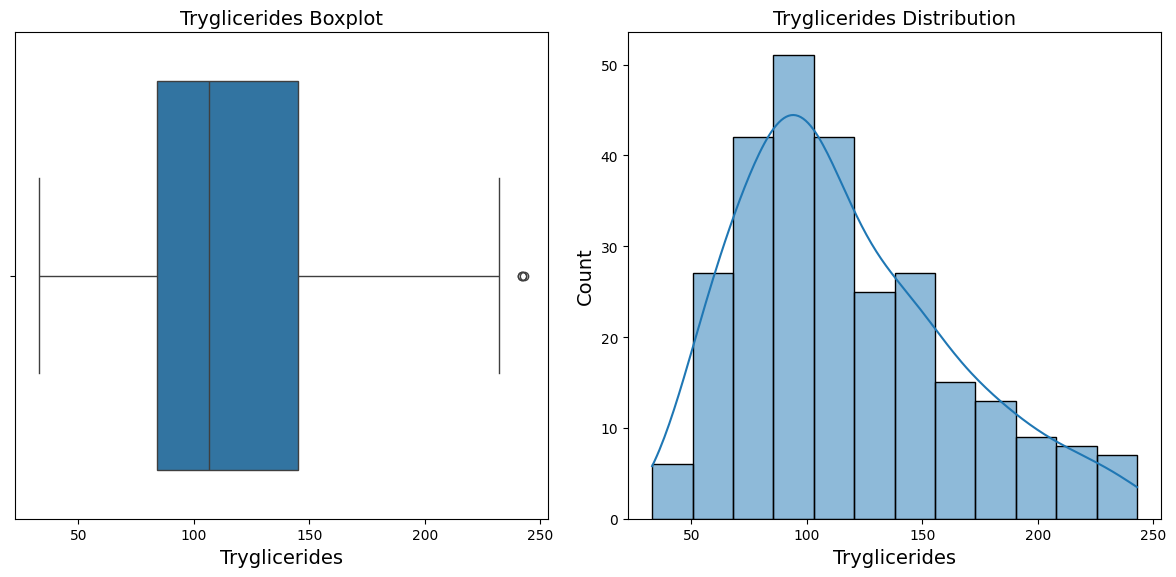

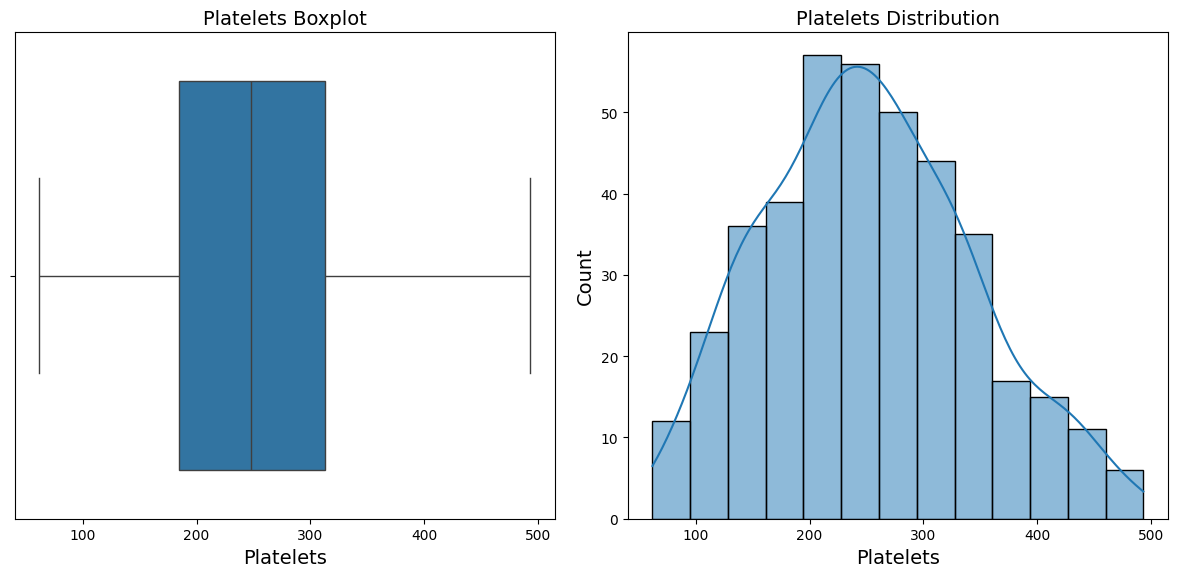

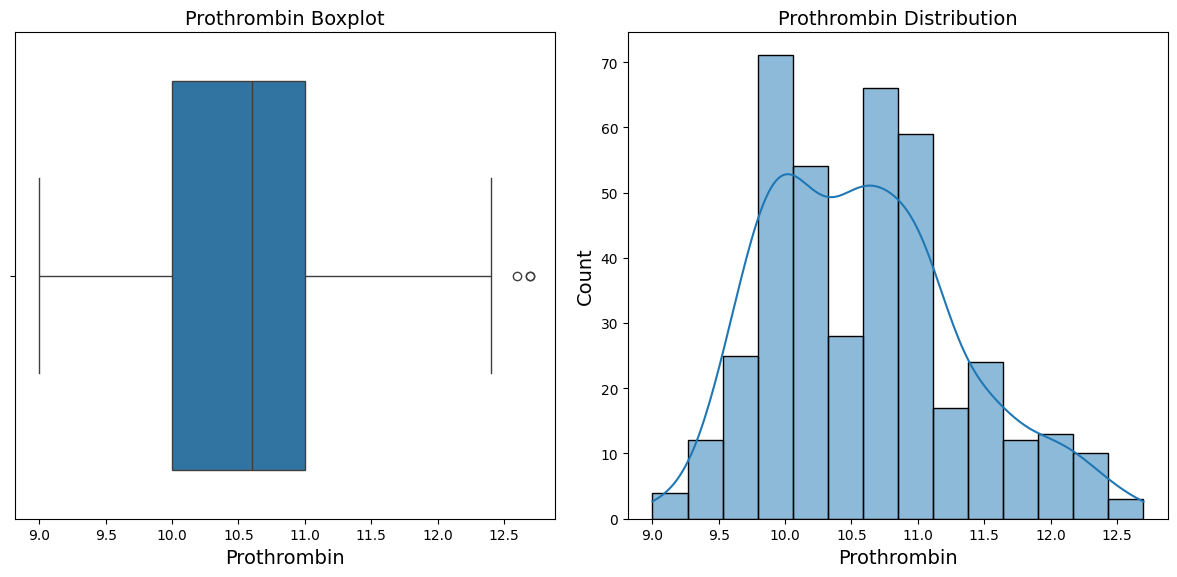

In [22]:
for feature in numerical_features:
    # Calculate the IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df.loc[(df[feature] < lower_bound) | (df[feature] > upper_bound), feature] = np.nan

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot
    sns.boxplot(x=df[feature], ax=axes[0])
    axes[0].set_title(f'{feature} Boxplot')

    # Plot distribution
    sns.histplot(data=df, x=feature, kde=True, ax=axes[1])
    axes[1].set_title(f'{feature} Distribution')

    plt.tight_layout()
    #fig.savefig(f'./plots/dist_without_outliers/{feature}_without_outliers.png')

In [23]:
summary_df = df[numerical_features].describe().loc[['min', 'mean', 'max']].T
summary_df

min          mean       max
N_Days           41.00   1917.782297   4795.00
Age            9598.00  18533.351675  28650.00
Bilirubin         0.30      1.897849      7.20
Cholesterol     120.00    318.041667    614.00
Albumin           2.48      3.519022      4.52
Copper            4.00     83.105802    243.00
Alk_Phos        289.00   1331.754513   3510.00
SGOT             26.35    117.945016    246.45
Tryglicerides    33.00    116.448529    243.00
Platelets        62.00    252.461347    493.00
Prothrombin       9.00     10.590955     12.70

#### <span style="color:lightgreen"> Feature recoding</span>

In [24]:
df.sample(10, random_state=25) 

N_Days Status             Drug      Age Sex Ascites Hepatomegaly Spiders  \
23   4079.0      D  D-penicillamine  16261.0   M       N            Y       N   
73   1827.0      D  D-penicillamine  18964.0   F       N            Y       Y   
97   3823.0      C  D-penicillamine  10550.0   F       N            N       N   
393  1367.0      C              NaN  20819.0   F     NaN          NaN     NaN   
285  1408.0      C  D-penicillamine  14191.0   F       N            Y       Y   
308   994.0      C          Placebo  21294.0   F       N            N       N   
140  3050.0      C  D-penicillamine  17180.0   F       N            N       N   
153   140.0      D  D-penicillamine  25340.0   M       N            N       Y   
163   264.0      D          Placebo  15857.0   F       N            Y       Y   
338  3492.0      C              NaN  21915.0   F     NaN          NaN     NaN   

    Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
23      N        2.1        456.0     4.00   124.0       NaN  221.88   
73      N        NaN        558.0     3.99     NaN     967.0   89.90   
97      N        1.0        239.0     3.77    77.0    1877.0   97.65   
393     S        2.0          NaN     3.07     NaN       NaN     NaN   
285     N        2.0        310.0     3.36    70.0    1257.0  122.00   
308     N        0.4        260.0     2.75    41.0    1166.0   70.00   
140     N        0.9        346.0     3.77    59.0     794.0  125.55   
153     Y        2.4        168.0     2.56   225.0    1056.0  120.90   
163     S        NaN          NaN     3.34   161.0    1428.0  181.35   
338     N        0.6          NaN     4.38     NaN       NaN     NaN   

     Tryglicerides  Platelets  Prothrombin  Stage  
23           230.0       70.0          9.9    2.0  
73             NaN      278.0         11.0    4.0  
97           101.0      312.0         10.2    1.0  
393            NaN       80.0         12.1    4.0  
285          118.0      143.0          9.8    3.0  
308           82.0      231.0         10.8    2.0  
140           56.0      336.0         10.6    2.0  
153           75.0      108.0          NaN    3.0  
163            NaN       88.0          NaN    4.0  
338            NaN      269.0         10.6    2.0

As we can see, "Age" feature has some really large values, and if we look at the database website we can realize that it is in days units, so in order to be more understandable, we transorm it into years. 

In [25]:
# Transform 'Age' into years
df['Age'] = df['Age'] / 365.25
df['Age'] = df['Age'].astype(int)

In [26]:
# Statistical summary of 'Age'
df['Age'].describe()

count    418.000000
mean      50.294258
std       10.471934
min       26.000000
25%       42.000000
50%       51.000000
75%       58.000000
max       78.000000
Name: Age, dtype: float64

#### One Hot Encoding (categorical features)

In [27]:
def one_hot_encode(df, categorical_columns):
    """
    Apply One-Hot Encoding to categorical columns in a DataFrame and replace the original columns.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    categorical_columns (list): List of names of categorical columns.

    Returns:
    pd.DataFrame: DataFrame with the original categorical columns replaced by One-Hot Encoded columns.
    """
    encoded_df = df.copy()

    for col in categorical_columns:
        # Perform One-Hot Encoding
        dummies = pd.get_dummies(encoded_df[col], prefix=col).astype(int)
        # Drop the original categorical column
        encoded_df = encoded_df.drop(col, axis=1)
        # Concatenate the dummy variables
        encoded_df = pd.concat([encoded_df, dummies], axis=1)

    return encoded_df

In [28]:
df_encoded = one_hot_encode(df, categorical_features)

In [29]:
df_encoded.head()

N_Days Status  Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0   400.0      D   58        NaN        261.0     2.60   156.0    1718.0   
1  4500.0      C   56        1.1        302.0     4.14    54.0       NaN   
2  1012.0      D   70        1.4        176.0     3.48   210.0     516.0   
3  1925.0      D   54        1.8        244.0     2.54    64.0       NaN   
4  1504.0     CL   38        3.4        279.0     3.53   143.0     671.0   

     SGOT  Tryglicerides  ...  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  \
0  137.95          172.0  ...               1          0          1        0   
1  113.52           88.0  ...               1          0          1        1   
2   96.10           55.0  ...               0          1          0        0   
3   60.63           92.0  ...               1          0          1        0   
4  113.15           72.0  ...               1          0          1        1   

   Edema_S  Edema_Y  Stage_1.0  Stage_2.0  Stage_3.0  Stage_4.0  
0        0        1          0          0          0          1  
1        0        0          0          0          1          0  
2        1        0          0          0          0          1  
3        1        0          0          0          0          1  
4        0        0          0          0          1          0  

[5 rows x 29 columns]

## 2. Variables preparation

In [30]:
df_original = df.copy()

#### <span style="color:lightgreen"> Analysis of correlations between numeric variables.</span>
  


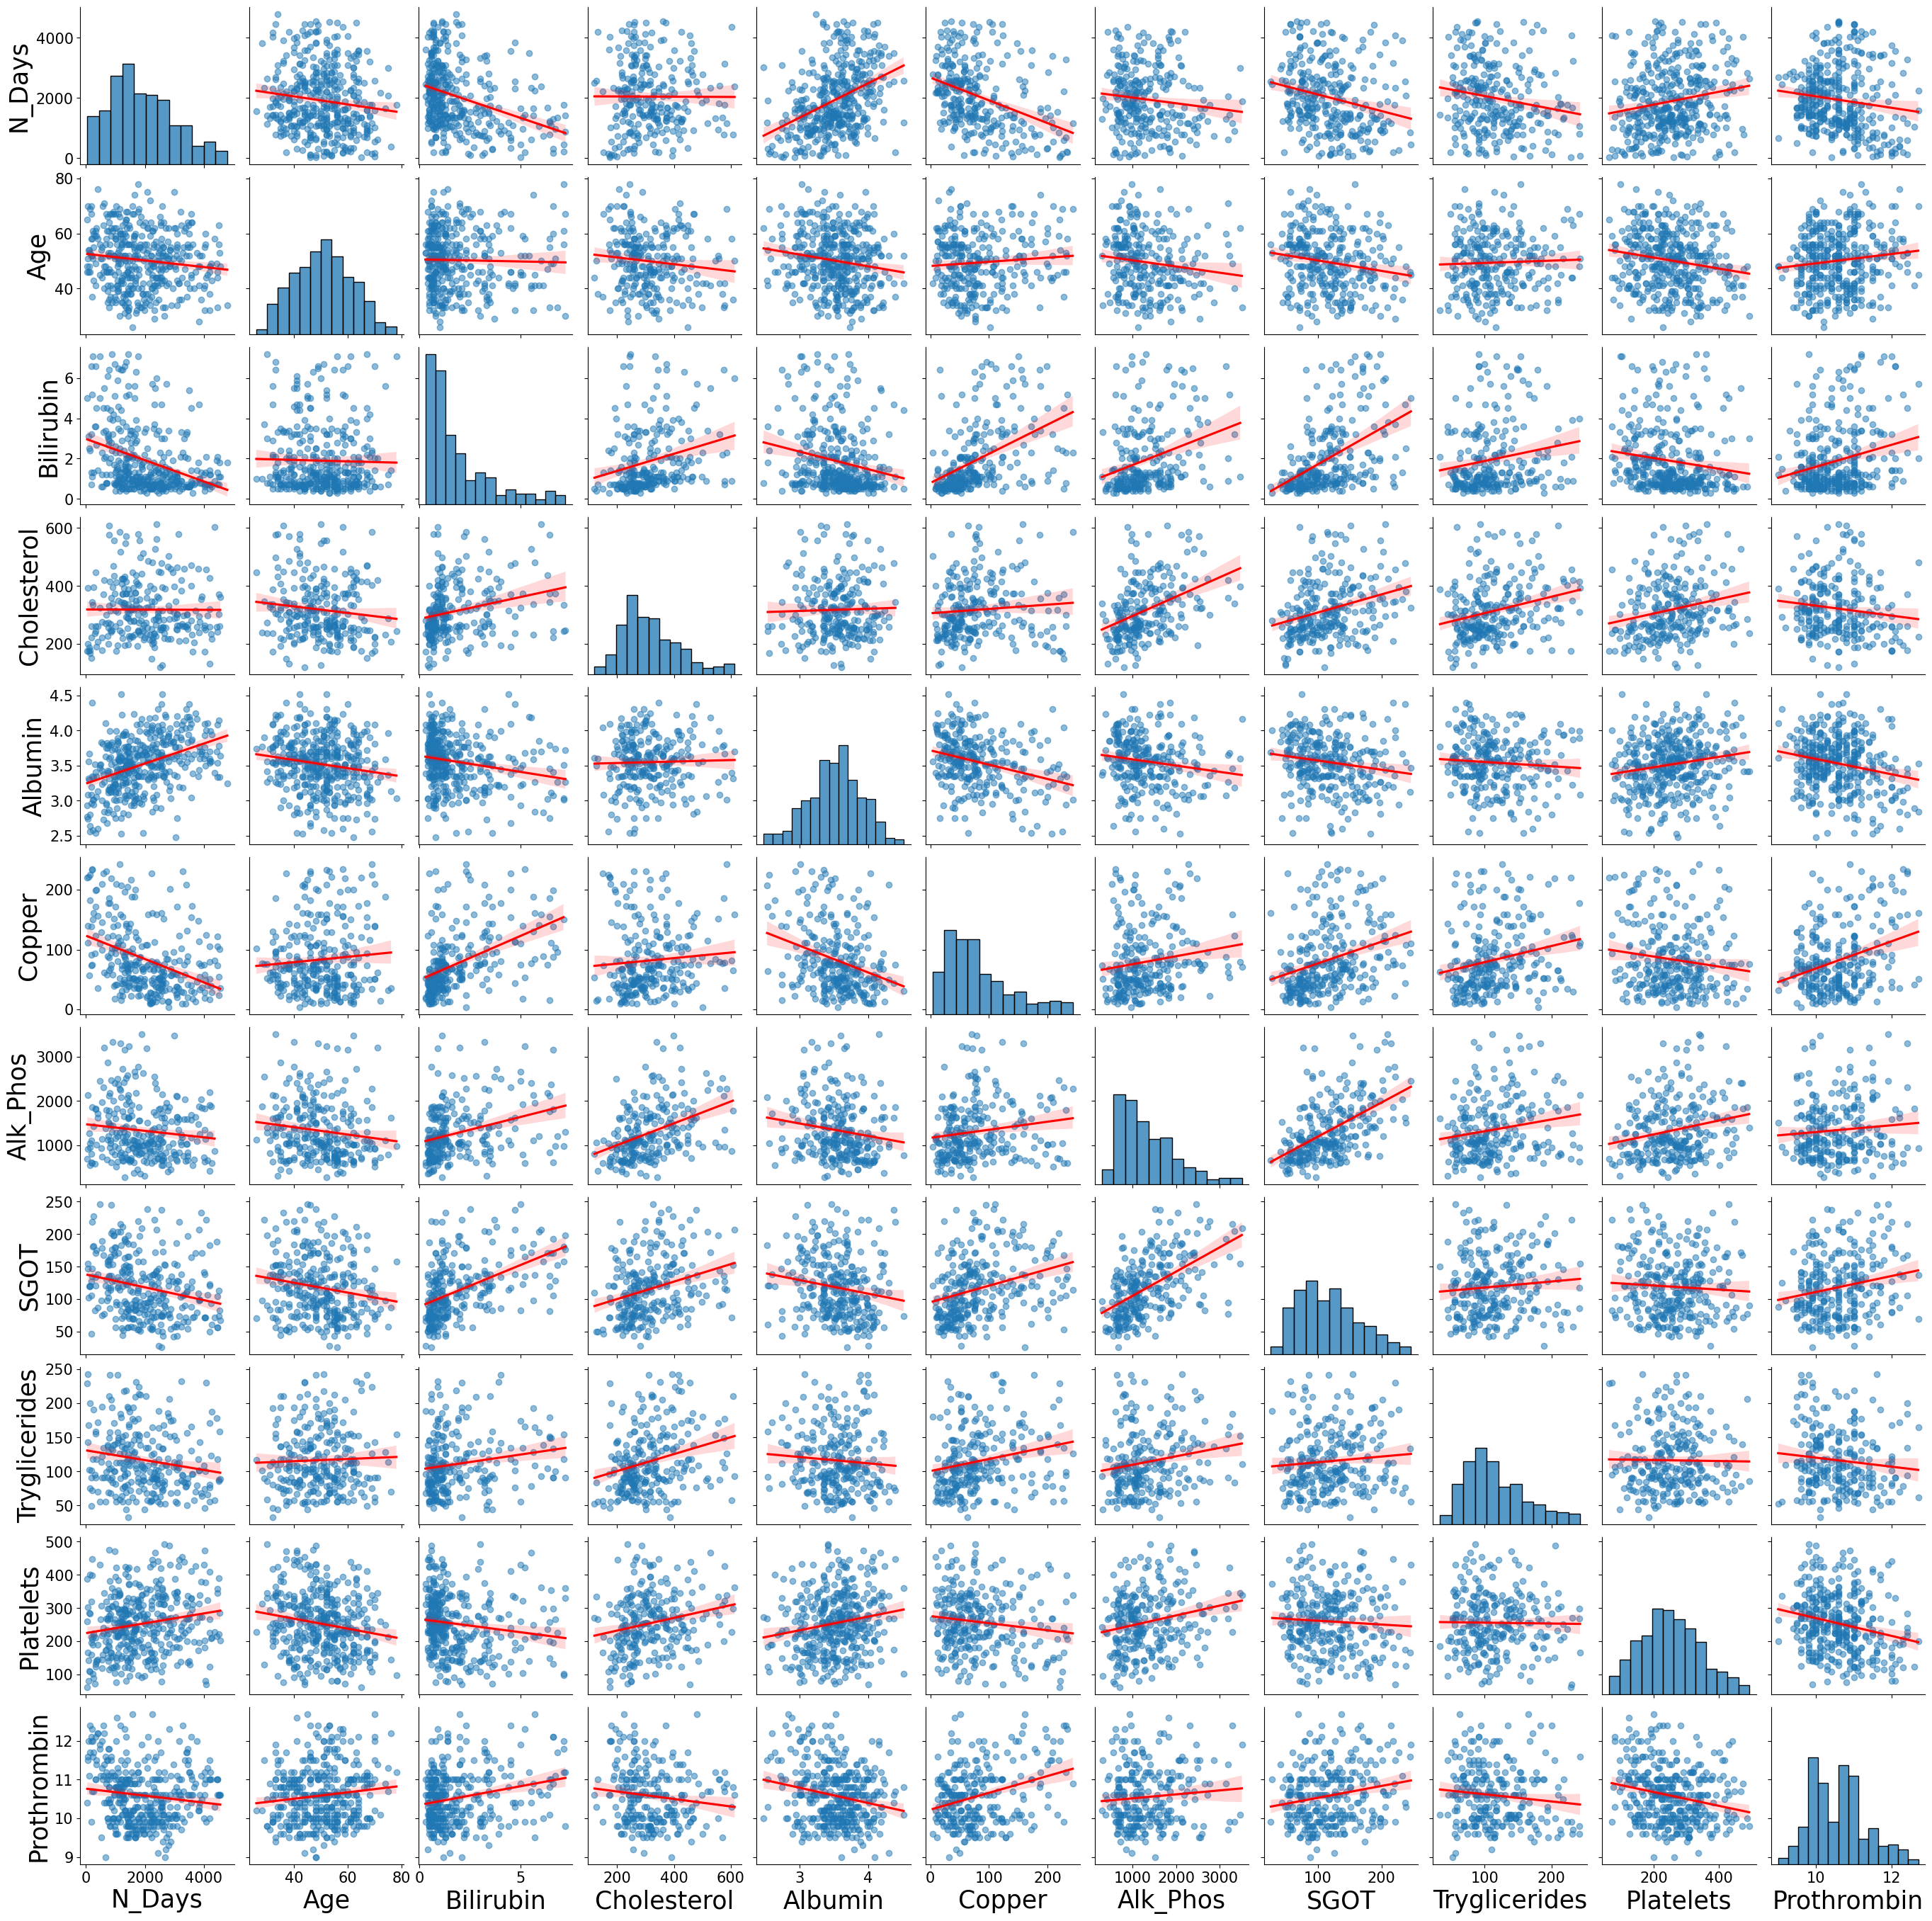

In [31]:
import seaborn as sns

# Plot pairwise relationships with regression lines
g = sns.pairplot(df[numerical_features], kind='reg', 
                 plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=25)
    ax.set_ylabel(ax.get_ylabel(), fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=15)

#g.savefig('./plots/correlations_numeric.png')

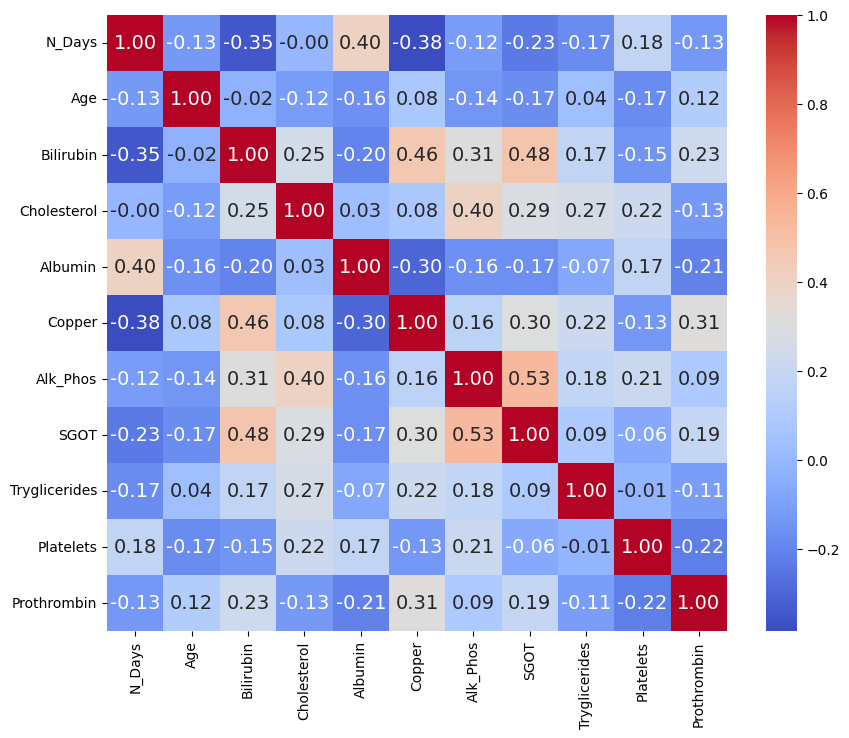

In [32]:
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
#plt.savefig('./plots/correlations_heatmap.png')
plt.show()

#### <span style="color:lightgreen"> Analysis of categorical variables and target variable. (1 Figure per categorical variable and target variable)</span>

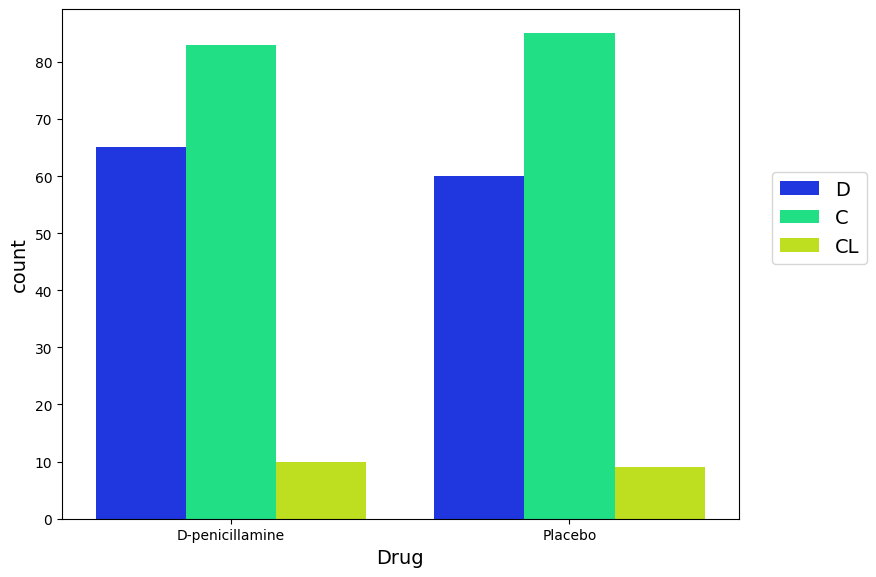

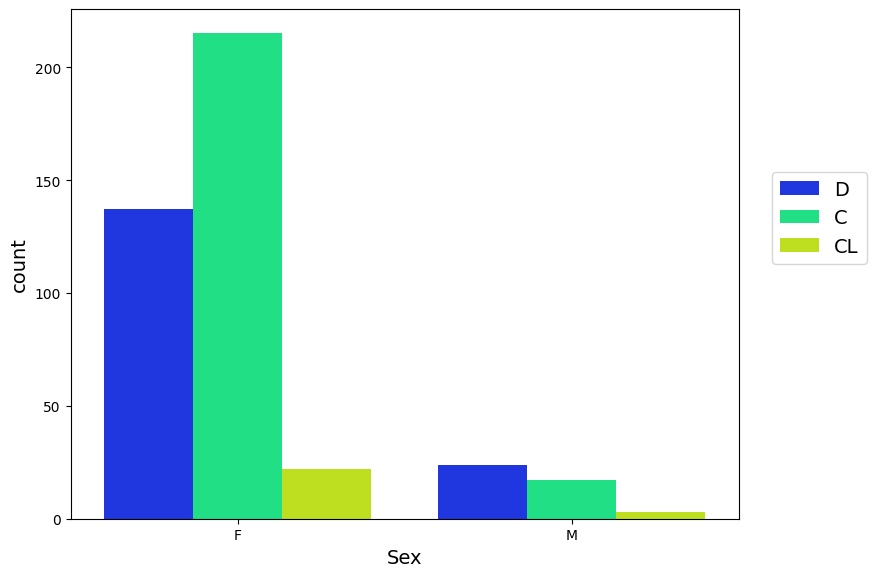

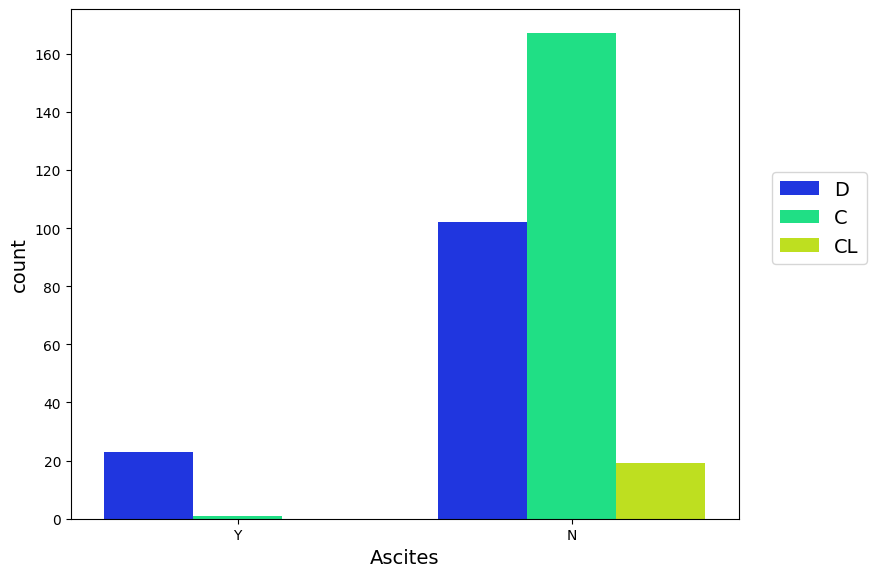

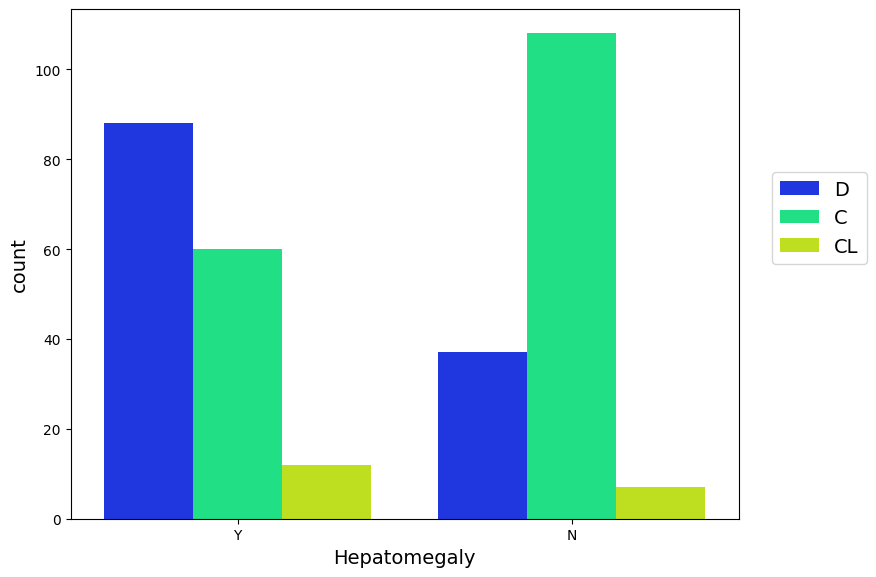

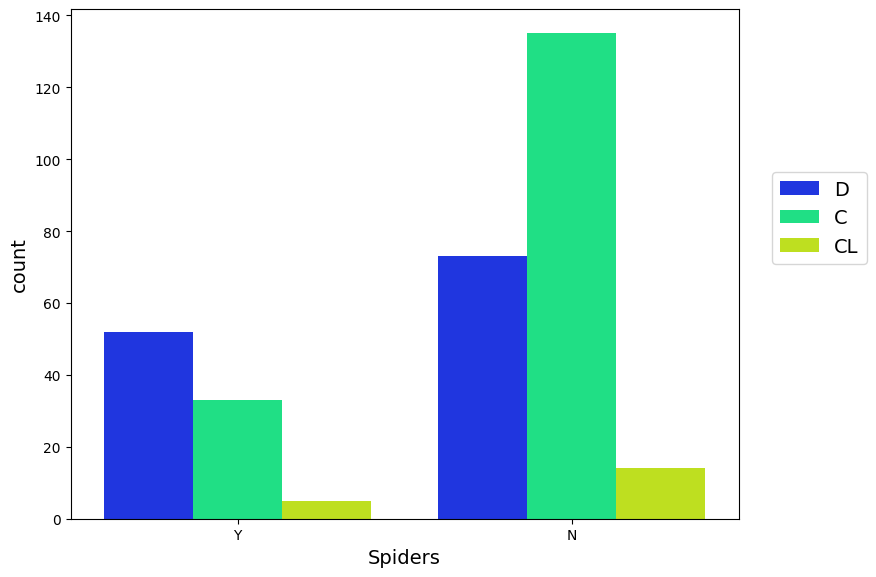

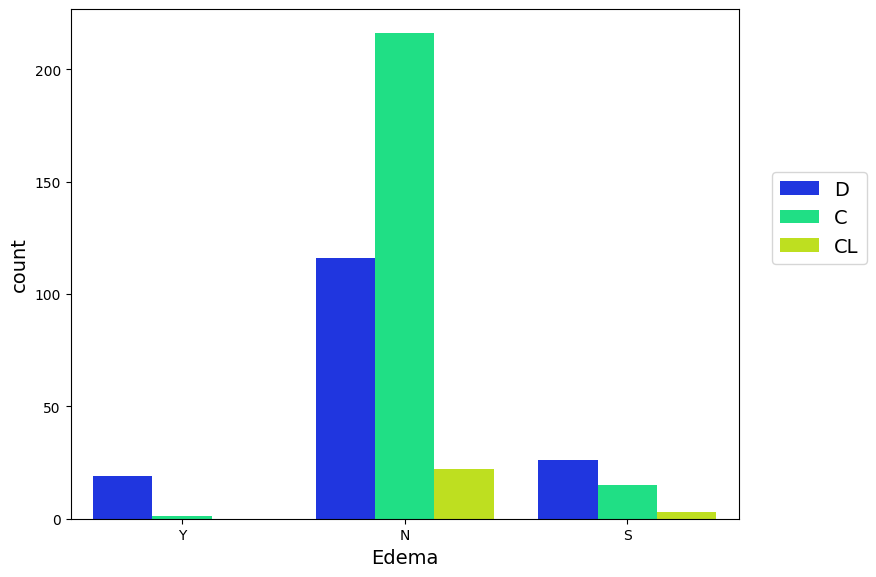

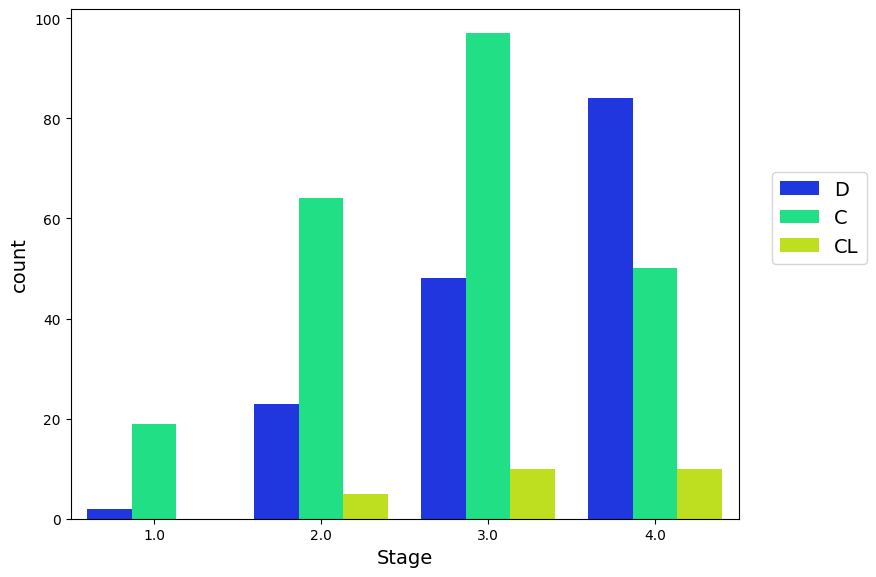

In [33]:
for col in categorical_features:
    plt.figure(figsize=(9,6), dpi=100)
    data = df[col].dropna()
    sns.countplot(x=data, hue=df['Status'], palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))
    plt.tight_layout()
    #plt.savefig(f'./plots/categorical_vs_target/{col}_vs_target.png')

In [34]:
def get_insights(data):    
    for cols in categorical_features[:-1]:
        cat_group = data.groupby(cols)['Status'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('*'*70)
        print("Insights from '{}' data".format(cols))
        print('*'*70)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('*'*70)
get_insights(df)

**********************************************************************
Insights from 'Drug' data
**********************************************************************
52.53 from D-penicillamine are C
55.19 from Placebo are C
**********************************************************************
**********************************************************************
Insights from 'Sex' data
**********************************************************************
57.49 from F are C
54.55 from M are D
**********************************************************************
**********************************************************************
Insights from 'Ascites' data
**********************************************************************
57.99 from N are C
95.83 from Y are D
**********************************************************************
**********************************************************************
Insights from 'Hepatomegaly' data
******************************************

/var/folders/_q/smcsdf790x717n74_z32l41h0000gq/T/ipykernel_7999/4055796113.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
/var/folders/_q/smcsdf790x717n74_z32l41h0000gq/T/ipykernel_7999/4055796113.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
/var/folders/_q/smcsdf790x717n74_z32l41h0000gq/T/ipykernel_7999/4055796113.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

<span style="font-size:16px;">  From the visualizations and insights, some points are clear:

* <span style="font-size:16px;"> The type of drug might not be a decisive factor in patient outcomes because the difference is relatively minor (52.53% of patients on D-penicillamine are censored ('C'), compared to 55.19% of patients on Placebo.).

* <span style="font-size:16px;"> 57.49% of female patients are censored ('C'), in contrast to 54.55% of male patients who experience death ('D').

* <span style="font-size:16px;">57.99% of patients without ascites are censored ('C'), whereas a significant 95.83% of those with ascites experience death ('D').
So a very high percentage of patients with Ascites experience death.

* <span style="font-size:16px;"> 71.05% of patients without hepatomegaly are censored ('C'), while 55% with hepatomegaly experience death ('D').
Therefore, absence of hepatomegaly is associated with a higher likelihood of being censored.

* <span style="font-size:16px;"> 60.81% of patients without spiders are censored ('C'), compared to 57.78% of patients with spiders who experience death ('D').
Presence of spiders is associated with a higher death rate.

* <span style="font-size:16px;"> Patients with mild (S) and severe (Y) edema tend to be in the 'D' category (59.09% and 95%, respectively).
This suggests that edema is a significant indicator of disease severity, with more severe edema associated with a higher likelihood of being in the 'D' category. 

In [35]:
# Drop 'Drug' column from df, df_encoded and categorical_features
df.drop('Drug', axis=1, inplace=True)
if 'Drug' in df_encoded.columns:
    df_encoded.drop('Drug', axis=1, inplace=True)
categorical_features.remove('Drug')

#### <span style="color:lightgreen"> Dataset partition</span>

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) 
y = df['Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=33)

In [37]:
# Create a table with the shape of the train, validation and test sets
sets_df = pd.DataFrame(columns=['Set', 'Number of Observations', 'Number of Features'])
sets_df.loc[len(sets_df)] = ['Train', X_train.shape[0], X_train.shape[1]]
sets_df.loc[len(sets_df)] = ['Test', X_test.shape[0], X_test.shape[1]]

sets_df

Set  Number of Observations  Number of Features
0  Train                     334                  17
1   Test                      84                  17

#### <span style="color:lightgreen"> Impute missing values</span>

In order to make a statistical analysis of the data before and after the imputation, we store the mean, standard error and median, and after the imnputation we will compare the results

In [38]:
missing_before_num = X_train[numerical_features].isnull().sum()
mean_before = X_train[numerical_features].mean()
stderr_before = X_train[numerical_features].sem()
median_before = X_train[numerical_features].median()

#### Impute missing values for numerical features

In [39]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])


In [40]:
missing_after_num = X_train[numerical_features].isnull().sum()
mean_after = X_train[numerical_features].mean()
stderr_after = X_train[numerical_features].sem()
median_after = X_train[numerical_features].median()

Now we can compare the results before and after the imputation.

In [41]:
stats_comparison_num = pd.DataFrame({
    'Feature': missing_before_num.index, 
    'Mean (old)': mean_before.values,
    'Mean': mean_after.values,
    'Std_Error (old)': stderr_before.values,
    'Std_Error': stderr_after.values,
    'Median (old)': median_before.values,
    'Median': median_after.values
})
stats_comparison_num


Feature   Mean (old)         Mean  Std_Error (old)  Std_Error  \
0          N_Days  1916.685629  1916.685629        59.760161  59.760161   
1             Age    50.485030    50.485030         0.568574   0.568574   
2       Bilirubin     1.840541     1.934970         0.093000   0.086215   
3     Cholesterol   317.703349   315.912575         7.041542   4.792527   
4         Albumin     3.546911     3.543653         0.021346   0.021077   
5          Copper    84.782979    87.682635         3.784959   2.845114   
6        Alk_Phos  1328.345291  1338.410180        44.263549  31.430301   
7            SGOT   117.722428   118.580485         3.072967   2.320435   
8   Tryglicerides   115.342593   115.544910         3.147270   2.137262   
9       Platelets   253.106250   252.763473         5.039293   4.851451   
10    Prothrombin    10.577918    10.607784         0.040980   0.039995   

    Median (old)    Median  
0        1730.00  1730.000  
1          51.50    51.500  
2           1.20     1.300  
3         296.00   300.900  
4           3.56     3.560  
5          69.00    77.000  
6        1134.00  1233.600  
7         110.05   113.947  
8         106.00   112.200  
9         249.00   248.500  
10         10.60    10.600

We can see some slight differences in the features that had originally missing values (the correspondent analysis is in the report).

#### Impute missing values for categorical features

In [42]:
# Save the original data
original_data = X_train.copy()

In [43]:
# List containing the names of categorical features that have at least one missing value
cat_features_missings = [feature for feature in categorical_features if X_train[feature].isnull().any()]
print(cat_features_missings)

['Ascites', 'Hepatomegaly', 'Spiders', 'Stage']


In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(X_train[categorical_features])

X_train[categorical_features] = imputer.transform(X_train[categorical_features])
X_test[categorical_features] = imputer.transform(X_test[categorical_features])

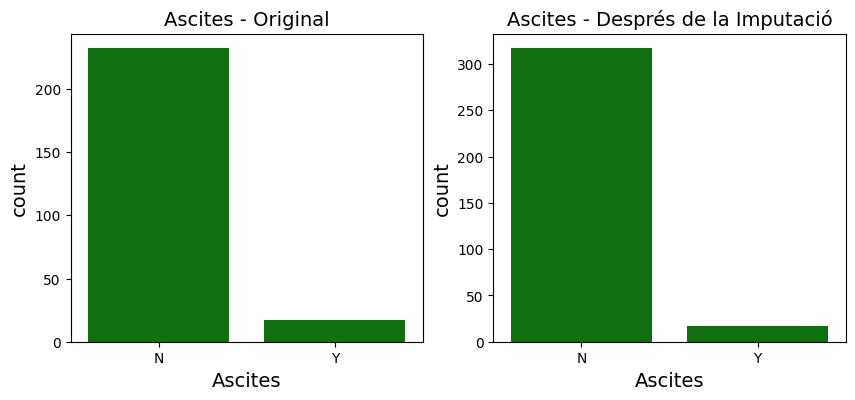

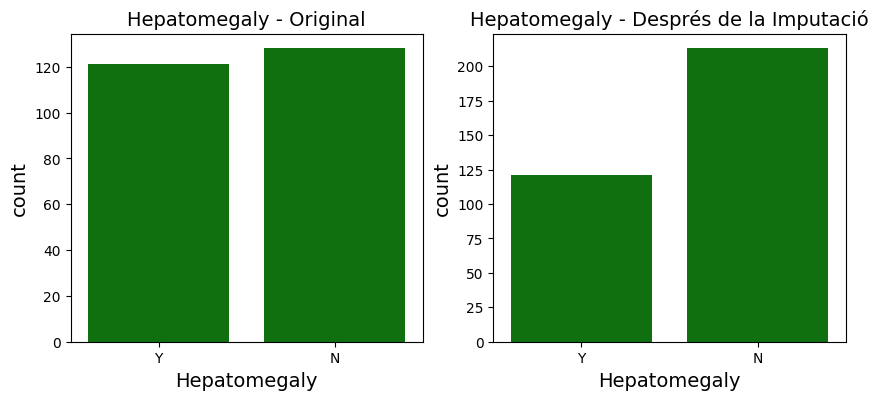

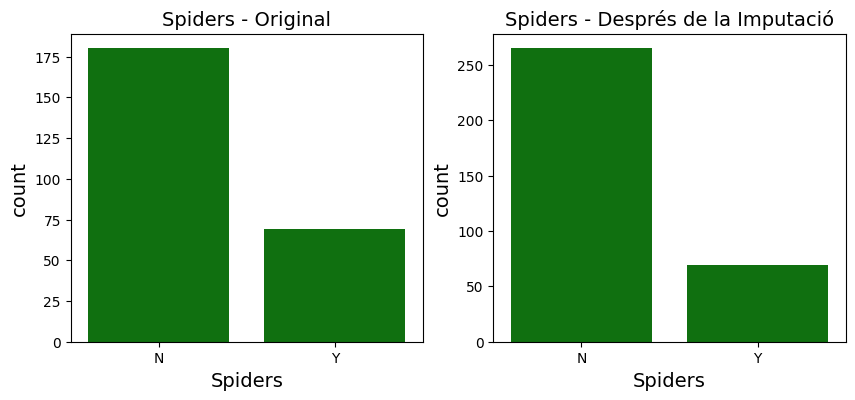

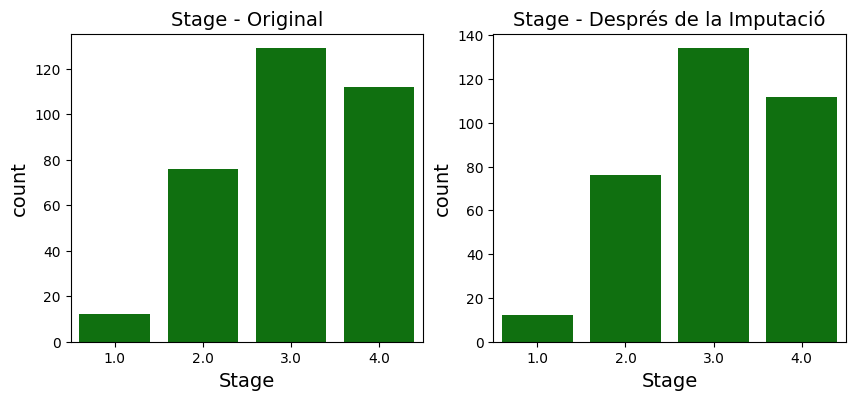

In [45]:
for feature in cat_features_missings:
    plt.figure(figsize=(10, 4))

    # Before imputation plot (excluding 'NaN' values)
    plt.subplot(1, 2, 1)
    # Filter out the NaN values
    filtered_data = original_data[original_data[feature].notna()]
    sns.countplot(data=filtered_data, x=feature, color='green')
    plt.title(f'{feature} - Original')

    # After imputation plot
    plt.subplot(1, 2, 2)
    sns.countplot(data=X_train, x=feature, color='green')
    plt.title(f'{feature} - Després de la Imputació')

    #plt.savefig(f'./plots/dist_moda/{feature}_moda.png')

As we can see, the 'most_frequent' imputation method has unbalanced some classes, let's try another method.

We will impute categorical features using the proportional imputation method. This method imputes missing values in categorical features based on the distribution of frequencies observed in the training data, so it maintains the original proportion of each category. 

In [46]:
X_train = original_data.copy()

def impute_categorical_proportional(train_df, test_df, feature):
    np.random.seed(33)
    freq_dist = train_df[feature].value_counts(normalize=True)
    missing_train = train_df[feature].isnull()
    train_df.loc[missing_train, feature] = np.random.choice(freq_dist.index, size=sum(missing_train), p=freq_dist.values)
    
    missing_test = test_df[feature].isnull()
    test_df.loc[missing_test, feature] = np.random.choice(freq_dist.index, size=sum(missing_test), p=freq_dist.values)

for feature in categorical_features:
    impute_categorical_proportional(X_train, X_test, feature)


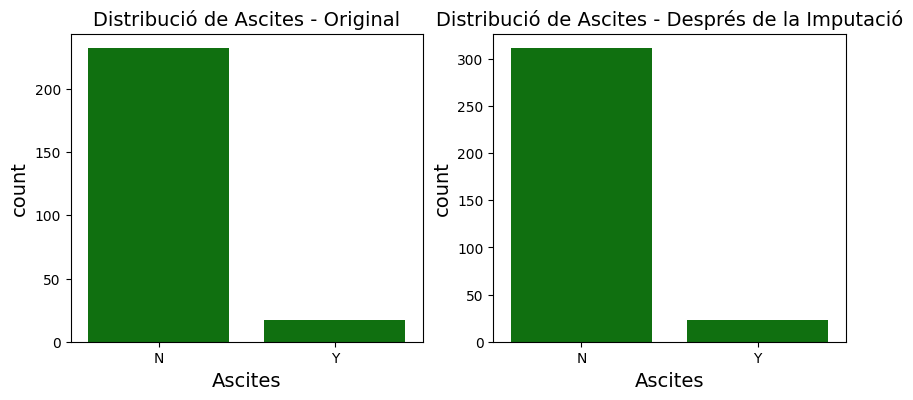

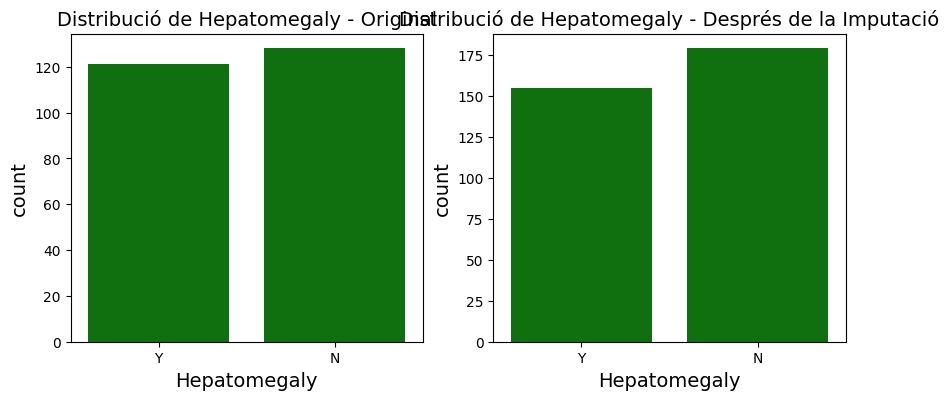

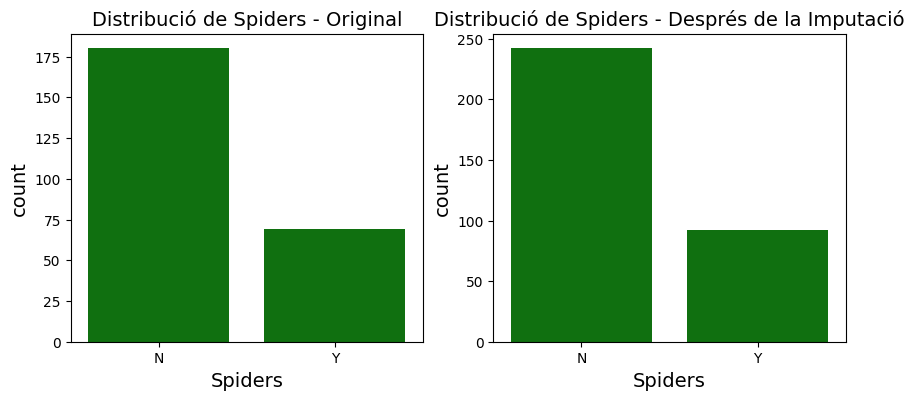

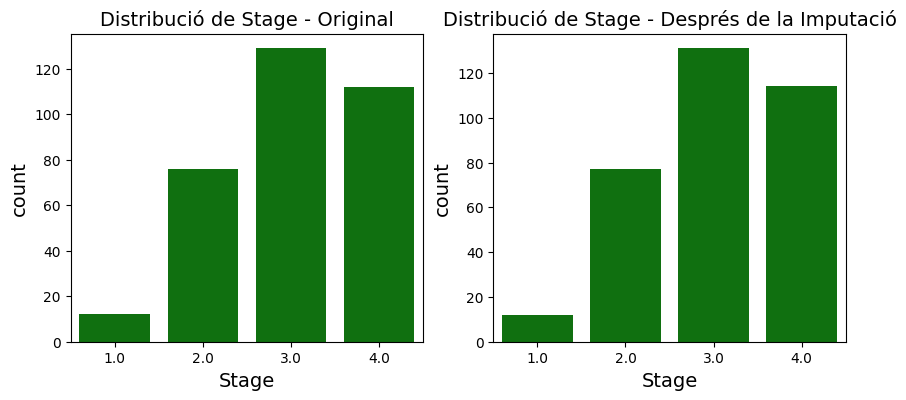

In [47]:
for feature in cat_features_missings:
    plt.figure(figsize=(10, 4))

    # Before imputation plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=original_data, x=feature, color='green')
    plt.title(f'Distribució de {feature} - Original')

    # After imputation plot
    plt.subplot(1, 2, 2)
    sns.countplot(data=X_train, x=feature, color='green')
    plt.title(f'Distribució de {feature} - Després de la Imputació')

    #plt.savefig(f'./plots/dist_prop/{feature}_prop.png')


Just to be sure, let's print the total number of missing values. It should be 0!

In [48]:
total_missing_values_train = X_train.isnull().sum().sum()
total_missing_values_test = X_test.isnull().sum().sum()

print(f"Total number of missing values in X_train: {total_missing_values_train}")

print(f"Total number of missing values in X_test: {total_missing_values_test}")

Total number of missing values in X_train: 0
Total number of missing values in X_test: 0


#### <span style="color:lightgreen"> Balance categorical features classes</span>

In [49]:
y_train.value_counts()

Status
C     185
D     129
CL     20
Name: count, dtype: int64

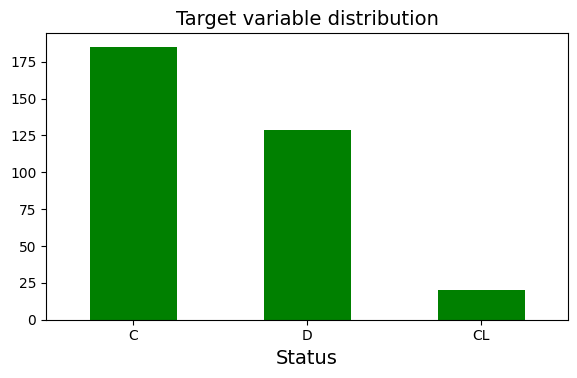

In [50]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
y_train.squeeze().value_counts().plot(kind='bar', color='green')
plt.title('Target variable distribution')
plt.xticks(rotation='horizontal')
plt.tight_layout()
#plt.savefig('./plots/status_prebalanced.png') 

In [51]:
from imblearn.over_sampling import SMOTENC

# Create a boolean list for the categorical features
categorical_features_bool = [feature in categorical_features for feature in X_train.columns]
smotenc = SMOTENC(categorical_features=categorical_features_bool, random_state=42)


# Apply SMOTENC to balance the classes
X_train, y_train = smotenc.fit_resample(X_train, y_train)

Now we have balanced the classes of the target variable 'Status'.

Let's verify that the target variable is balanced



In [52]:
counts = y_train.value_counts().reset_index()
counts.columns = ['Class', 'Count']
print(counts.to_string(index=False))

Class  Count
    C    185
    D    185
   CL    185


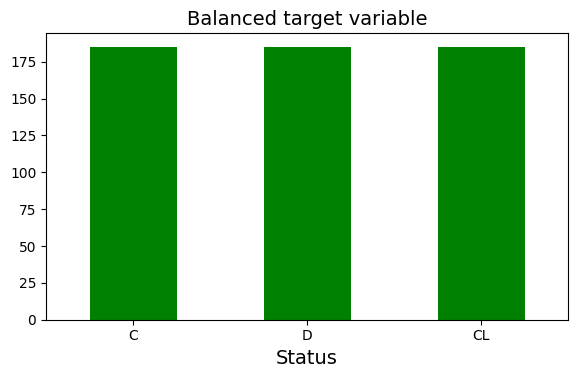

In [53]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
y_train.squeeze().value_counts().plot(kind='bar', color='green')
plt.title('Balanced target variable')
plt.xticks(rotation='horizontal')
plt.tight_layout()
#plt.savefig('./plots/balanced_target_variable.png')


#### <span style="color:lightgreen"> Elimination of redundant or noisy variables, taking into account the objective task.</span>

In [54]:
X_train_encoded = one_hot_encode(X_train, categorical_features)

In [55]:
from scipy.stats import chi2_contingency

redundant_features = []

for col in X_train_encoded.columns:
    contingency_table = pd.crosstab(X_train_encoded[col], y_train)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p > 0.05:  # Asumiendo un nivel de significancia de 0.05
        print(f"Column: {col}, P-value: {p}")
        redundant_features.append(col)

print("Redundant features:")
print(redundant_features)

Column: N_Days, P-value: 0.4016520321137947
Column: Cholesterol, P-value: 0.1372286254826916
Column: Copper, P-value: 0.08079936752422419
Column: Alk_Phos, P-value: 0.30488075238060075
Column: Tryglicerides, P-value: 0.06618189722517576
Column: Platelets, P-value: 0.09786557557755288
Redundant features:
['N_Days', 'Cholesterol', 'Copper', 'Alk_Phos', 'Tryglicerides', 'Platelets']


In [56]:
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

for col in redundant_features:
    cramers_v_value = cramers_v(X_train_encoded[col], y_train)
    if cramers_v_value < 0.15:
        print(f"Cramer's V for {col} and Status: {cramers_v_value}")


Cramer's V for N_Days and Status: 0.09037069499947871
Cramer's V for Alk_Phos and Status: 0.13807898078770117


As we can see, 'N_Days' and 'Alk_Phos' have a very weak association with the target variable 'Status', as indicated by their Cramer's V values (0.09037 for 'N_Days' and 0.13808 for 'Alk_Phos') and high p-values (0.40165 and 0.30488, respectively). These statistics suggest that these features are statistically redundant.

Therefore, I have decided to remove these two features from our model. 

Additionally, there is no categorical variable for which all its categories are redundant according to the statistical tests, so I am not removing any categorical variables from the model at this stage.

In [57]:
# Remove them from training and test sets, and from the list of categorical features
numerical_features = [feature for feature in numerical_features if feature not in ['N_Days', 'Alk_Phos']]

X_train.drop(['N_Days', 'Alk_Phos'], axis=1, inplace=True)
X_test.drop(['N_Days', 'Alk_Phos'], axis=1, inplace=True)

X_train_encoded = one_hot_encode(X_train, categorical_features)

#### <span style="color:lightgreen"> Variables normalization</span>
  
Let's normalize each feature with MinMaxScaler() and then take a look at the new distribution

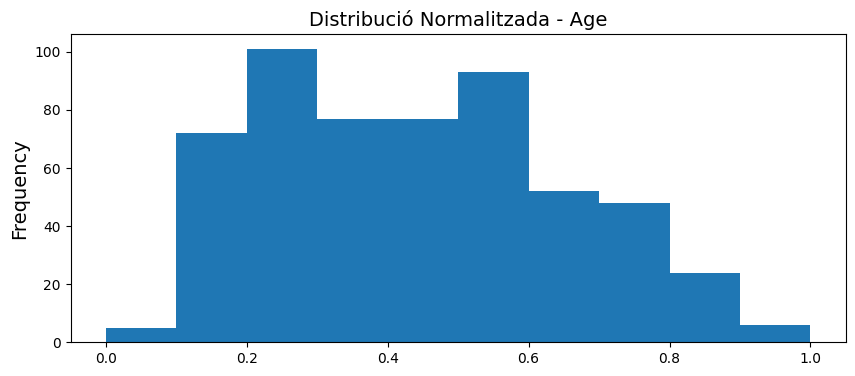

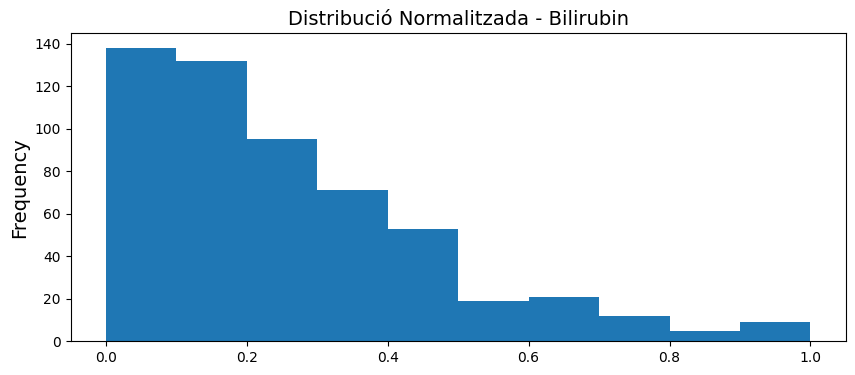

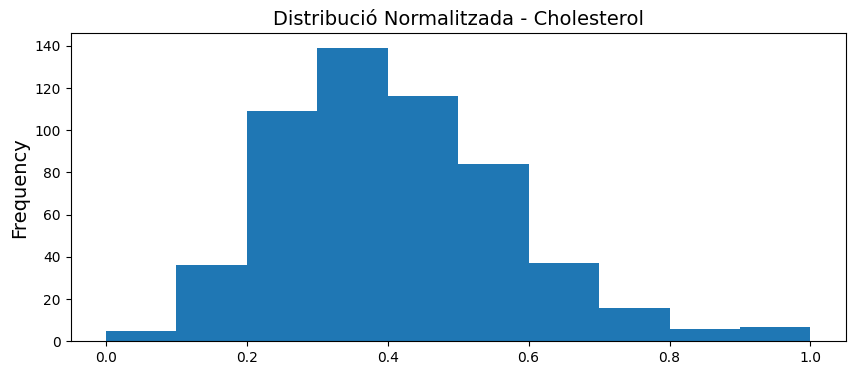

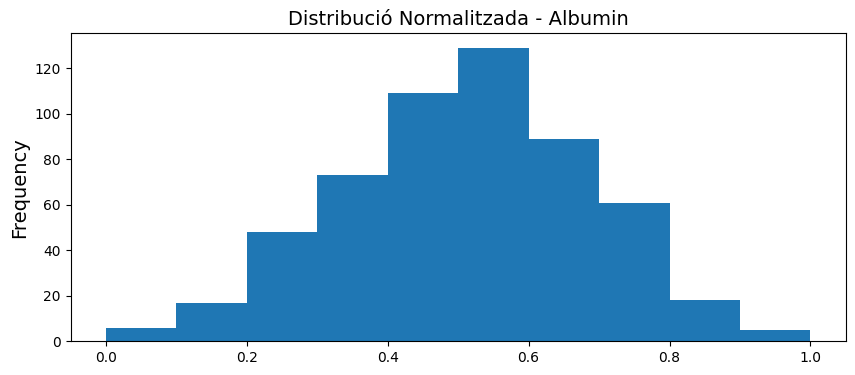

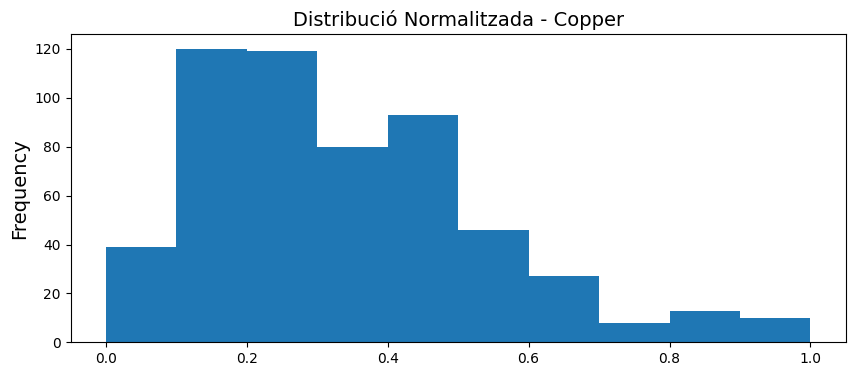

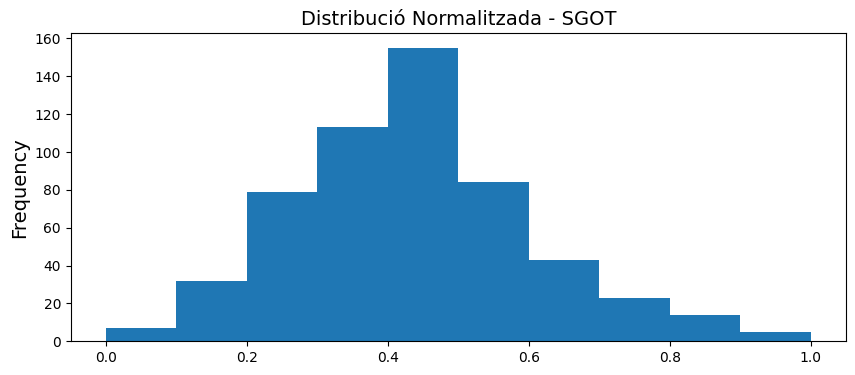

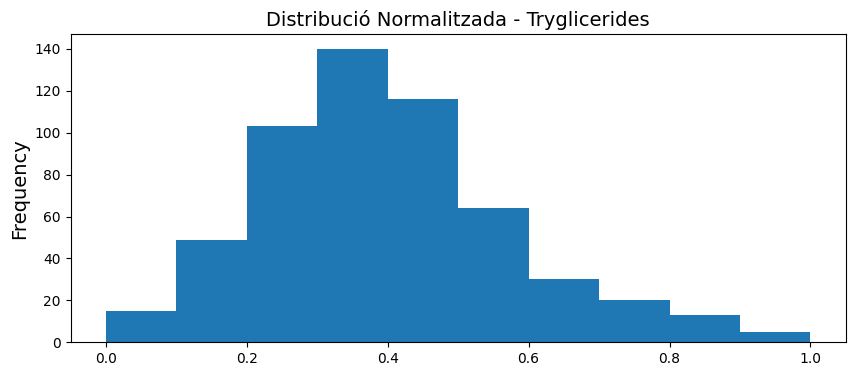

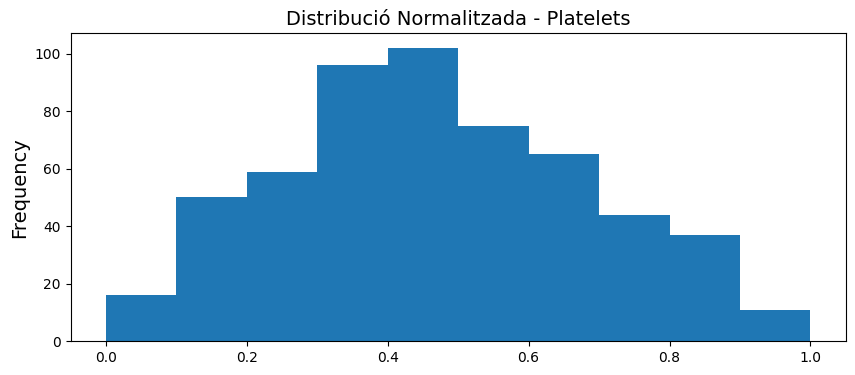

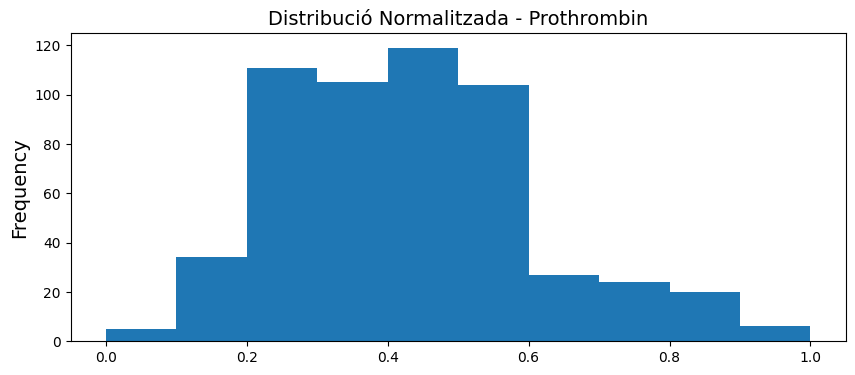

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test_normalized = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features)

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    X_train_normalized[feature].plot.hist()
    plt.title(f'Distribució Normalitzada - {feature}')
    #plt.savefig(f'./plots/normalized/{feature}_normalized.png')



#### <span style="color:lightgreen"> Study of dimensionality with PCA. Is it necessary to reduce variables? (1 Figure with explained variance and number of dimensions).</span>

#### Principal component analysis in scikit-learn:

First we need to standarize the data

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train[numerical_features])
X_test_std = sc.transform(X_test[numerical_features])

In [60]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.2470439 , 0.19034719, 0.12878332, 0.09342349, 0.08394561,
       0.07513873, 0.07140227, 0.05934692, 0.05056855])

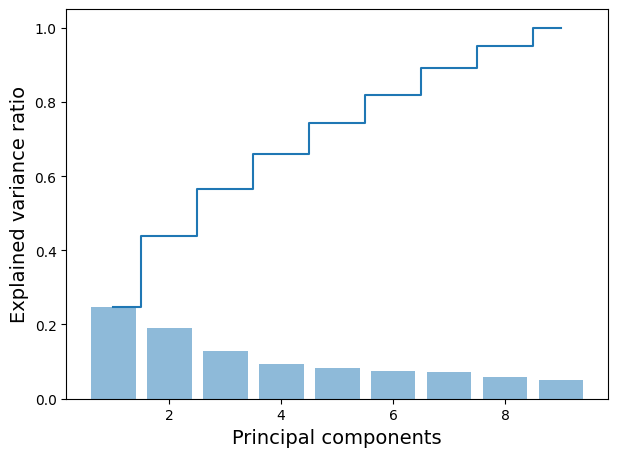

In [61]:
num_components = len(pca.explained_variance_ratio_)
plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.tight_layout()
#plt.savefig('./plots/pca_variance_ratio.png')

plt.show()

In [62]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

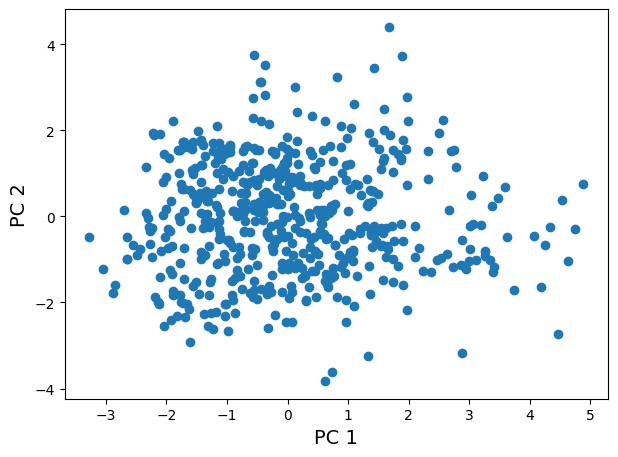

In [63]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
#plt.savefig('./plots/pca_scatter.png')

plt.show()

# Train 3 models

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score

In [65]:
def plot_confusion_matrix(y_true, y_pred):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    import numpy as np

    cm = confusion_matrix(y_true, y_pred)

    class_names = np.unique(np.concatenate((y_true, y_pred)))  

    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

    plt.show()

In [66]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_train, y_train):
    # Definició de les mètriques a utilitzar
    scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

    # Realització de la validació creuada
    cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)

    # Càlcul de la mitjana de les mètriques per a l'entrenament i la validació
    print("\nAverage Cross-Validation Scores:")
    for metric in scoring:
        mean_train_score = np.mean(cv_results[f'train_{metric}'])
        mean_test_score = np.mean(cv_results[f'test_{metric}'])
        print(f"{metric.capitalize()} - Train: {mean_train_score:.3f}, Test: {mean_test_score:.3f}")

    # Fes prediccions utilitzant validació creuada
    y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

    # Informe de classificació i matriu de confusió
    print("\nClassification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nConfusion Matrix:")
    plot_confusion_matrix(y_train, y_train_pred)


In [67]:
def evaluate_final_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    print("\nTest Classification Report:")
    print(classification_report(y_test, y_test_pred))

    print("\nTest Confusion Matrix:")
    plot_confusion_matrix(y_test, y_test_pred)


In [68]:
def save_results(clf, X_test, y_test, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
    return df

results_df = pd.DataFrame()

#### <span style="color:lightgreen"> Discussion of available hyperparameters and the values used. 1 Table (list of hyperparameters and tested values)</span>

In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder and transform X_train
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Transform X_test using the same encoder
X_test_encoded = encoder.transform(X_test[categorical_features])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

/Users/pau/Desktop/2n/IAA/lab/IAA-practica/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### From now on, X_train and X_test will have numerical features standardized and categorical features encoded.

In [70]:
# Create a DataFrame with the standardized numerical features and the encoded categorical features
X_train = pd.concat([pd.DataFrame(X_train_std, columns=numerical_features),
                              X_train_encoded],
                             axis=1)

X_test = pd.concat([pd.DataFrame(X_test_std, columns=numerical_features),
                              X_test_encoded],
                             axis=1)

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

"""best_knn_params = None
best_tree_params = None
best_svm_params = None

for _ in range(10):  # Change this to the number of times you want to run
    # Hiperparàmetres per a KNN
    knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}
    knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10, scoring='f1_macro')  
    knn_grid.fit(X_train, y_train)
    if best_knn_params is None or knn_grid.best_score_ > best_knn_params[1]:
        best_knn_params = (knn_grid.best_params_, knn_grid.best_score_)

    # Hiperparàmetres per a l'Arbre de Decisió
    tree_params = {'max_depth': [None, 3, 5, 7, 10], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10]}
    tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=33), tree_params, cv=10, scoring='f1_macro')  
    tree_grid.fit(X_train, y_train)
    if best_tree_params is None or tree_grid.best_score_ > best_tree_params[1]:
        best_tree_params = (tree_grid.best_params_, tree_grid.best_score_)

    # Hiperparàmetres per a SVM
    svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
    svm_grid = GridSearchCV(SVC(random_state=33), svm_params, cv=10, scoring='f1_macro')  
    svm_grid.fit(X_train, y_train)
    if best_svm_params is None or svm_grid.best_score_ > best_svm_params[1]:
        best_svm_params = (svm_grid.best_params_, svm_grid.best_score_)

# Resultats
print("Millors hiperparàmetres per a KNN:", best_knn_params[0])
print("Millors hiperparàmetres per a l'Arbre de Decisió:", best_tree_params[0])
print("Millors hiperparàmetres per a SVM:", best_svm_params[0])"""

'best_knn_params = None\nbest_tree_params = None\nbest_svm_params = None\n\nfor _ in range(10):  # Change this to the number of times you want to run\n    # Hiperparàmetres per a KNN\n    knn_params = {\'n_neighbors\': [3, 5, 7, 9, 11], \'weights\': [\'uniform\', \'distance\'], \'metric\': [\'euclidean\', \'manhattan\', \'minkowski\']}\n    knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10, scoring=\'f1_macro\')  \n    knn_grid.fit(X_train, y_train)\n    if best_knn_params is None or knn_grid.best_score_ > best_knn_params[1]:\n        best_knn_params = (knn_grid.best_params_, knn_grid.best_score_)\n\n    # Hiperparàmetres per a l\'Arbre de Decisió\n    tree_params = {\'max_depth\': [None, 3, 5, 7, 10], \'criterion\': [\'gini\', \'entropy\'], \'min_samples_split\': [2, 5, 10]}\n    tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=33), tree_params, cv=10, scoring=\'f1_macro\')  \n    tree_grid.fit(X_train, y_train)\n    if best_tree_params is None or tree_grid

#### <span style="color:lightgreen"> Initial training using training data. Figures/Tables. (learning outcomes)</span>

## K-nearest neighbors (KNN)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')


Average Cross-Validation Scores:
Precision_macro - Train: 1.000, Test: 0.792
Recall_macro - Train: 1.000, Test: 0.780
Accuracy - Train: 1.000, Test: 0.781
F1_macro - Train: 1.000, Test: 0.772

Classification Report:
              precision    recall  f1-score   support

           C       0.79      0.64      0.71       185
          CL       0.75      0.98      0.85       185
           D       0.82      0.71      0.76       185

    accuracy                           0.78       555
   macro avg       0.79      0.78      0.77       555
weighted avg       0.79      0.78      0.77       555


Confusion Matrix:


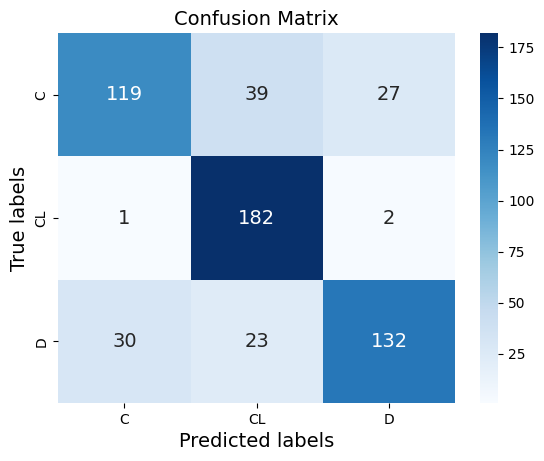

In [73]:
evaluate_model(knn, X_train, y_train)


Test Classification Report:
              precision    recall  f1-score   support

           C       0.74      0.55      0.63        47
          CL       0.09      0.40      0.14         5
           D       0.69      0.56      0.62        32

    accuracy                           0.55        84
   macro avg       0.51      0.51      0.47        84
weighted avg       0.68      0.55      0.60        84


Test Confusion Matrix:


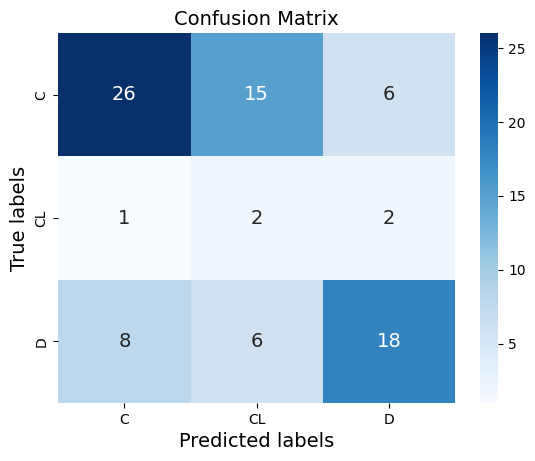

In [74]:
results_df = save_results(knn, X_test, y_test, 'KNN', results_df)
evaluate_final_model(knn, X_test, y_test)

/Users/pau/Desktop/2n/IAA/lab/IAA-practica/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


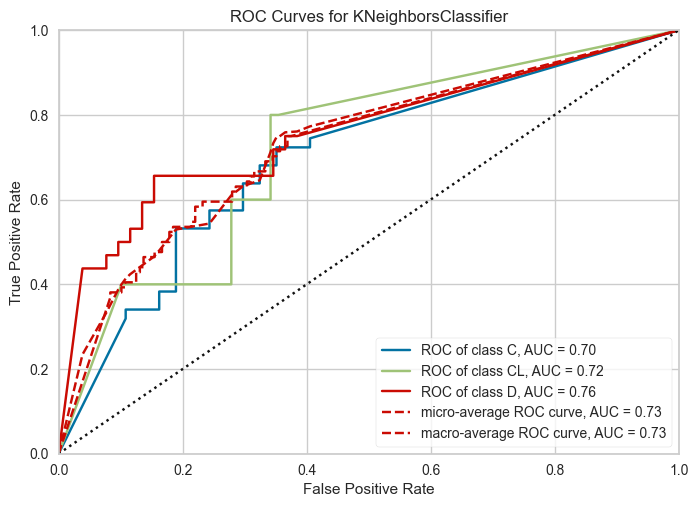

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=3,
                                      weights='distance'))

In [75]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(knn, X_test,y_test, ax=plt.subplot())

## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=10,
                                    min_samples_split=5, 
                                    random_state=33)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=33)


Average Cross-Validation Scores:
Precision_macro - Train: 0.941, Test: 0.737
Recall_macro - Train: 0.939, Test: 0.735
Accuracy - Train: 0.939, Test: 0.735
F1_macro - Train: 0.939, Test: 0.731

Classification Report:
              precision    recall  f1-score   support

           C       0.68      0.65      0.67       185
          CL       0.78      0.88      0.82       185
           D       0.74      0.68      0.70       185

    accuracy                           0.74       555
   macro avg       0.73      0.74      0.73       555
weighted avg       0.73      0.74      0.73       555


Confusion Matrix:


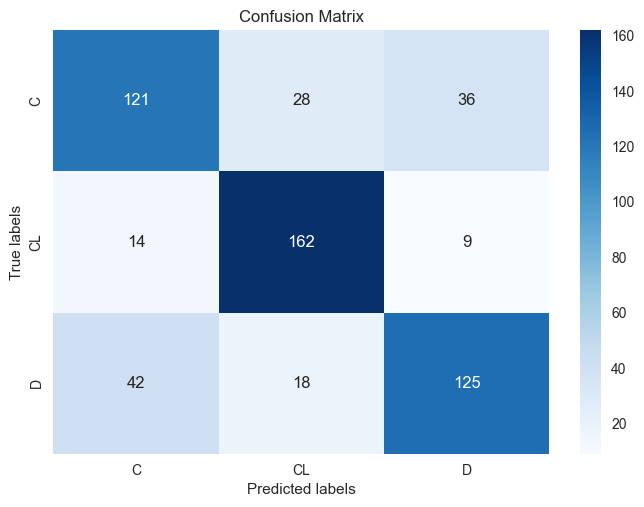

In [77]:
evaluate_model(tree_model, X_train, y_train)

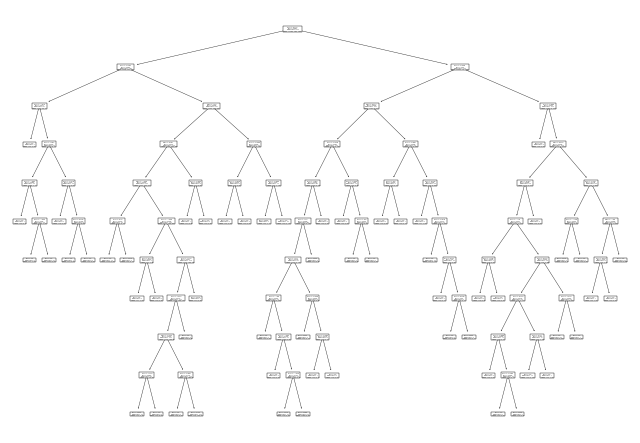

In [78]:
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('./plots/tree_model.png')
plt.show()

In [79]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 33,
 'splitter': 'best'}

Number of nodes in the last tree is: 3 with ccp_alpha: 0.11397294998003382


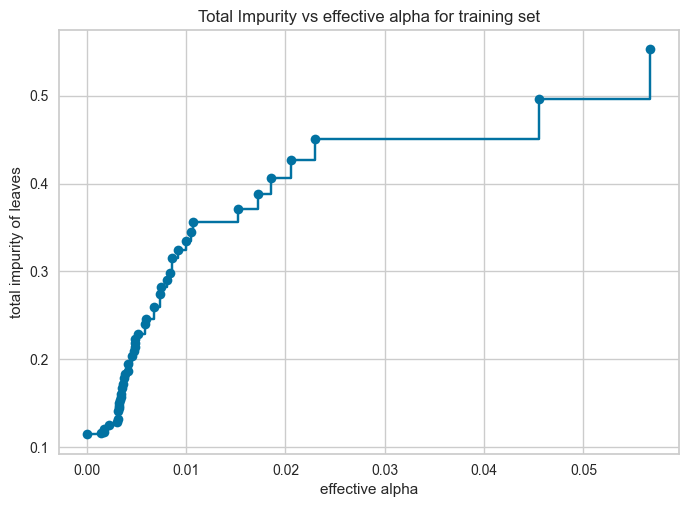

In [80]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        tree_models[-1].tree_.node_count, ccp_alphas[-1]
    )
)
#plt.savefig('./plots/impurity.png')

In [81]:
from sklearn.model_selection import cross_val_score

# Initialize a list to store cross-validation scores
cv_scores = []

for model in tree_models:
    cv_score = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro').mean()
    cv_scores.append(cv_score)

# Find the index of the model with the highest cross-validation score
best_model_index = np.argmax(cv_scores)

best_model_index

27

In [82]:
tree_models[best_model_index]

DecisionTreeClassifier(ccp_alpha=0.005984555984555988, random_state=0)

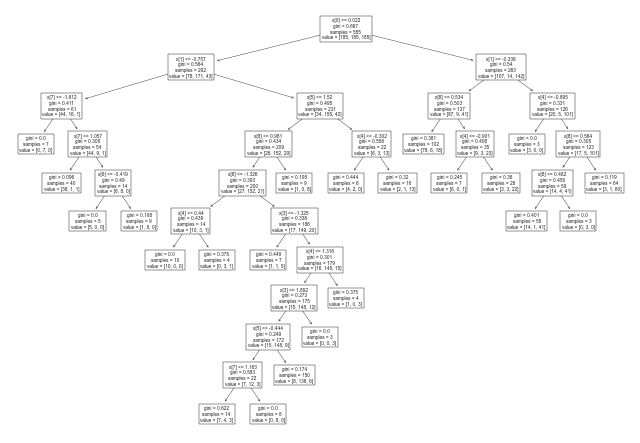

In [83]:
from sklearn import tree

tree.plot_tree(tree_models[best_model_index])
#plt.savefig('./plots/tree_models.png')
plt.show()


Average Cross-Validation Scores:
Precision_macro - Train: 0.864, Test: 0.766
Recall_macro - Train: 0.862, Test: 0.762
Accuracy - Train: 0.862, Test: 0.762
F1_macro - Train: 0.862, Test: 0.759

Classification Report:
              precision    recall  f1-score   support

           C       0.71      0.72      0.71       185
          CL       0.80      0.84      0.82       185
           D       0.78      0.72      0.75       185

    accuracy                           0.76       555
   macro avg       0.76      0.76      0.76       555
weighted avg       0.76      0.76      0.76       555


Confusion Matrix:


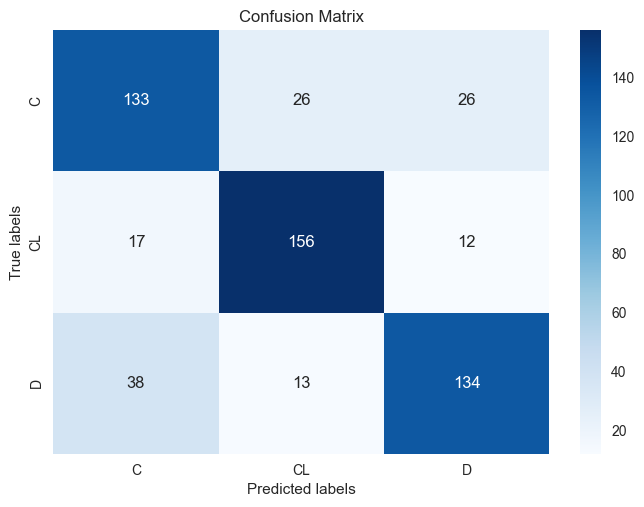

In [84]:
evaluate_model(tree_models[best_model_index], X_train, y_train)


Test Classification Report:
              precision    recall  f1-score   support

           C       0.72      0.62      0.67        47
          CL       0.17      0.40      0.24         5
           D       0.59      0.59      0.59        32

    accuracy                           0.60        84
   macro avg       0.50      0.54      0.50        84
weighted avg       0.64      0.60      0.61        84


Test Confusion Matrix:


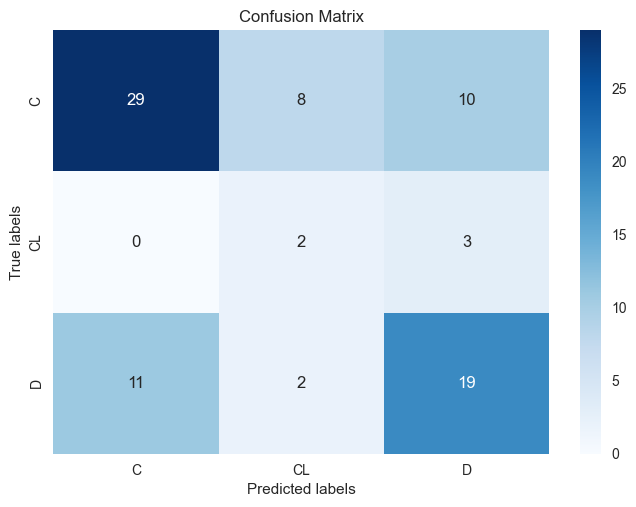

In [85]:
results_df = save_results(tree_models[best_model_index], X_test, y_test, 'Decision Tree', results_df)
evaluate_final_model(tree_models[best_model_index], X_test, y_test)

/Users/pau/Desktop/2n/IAA/lab/IAA-practica/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


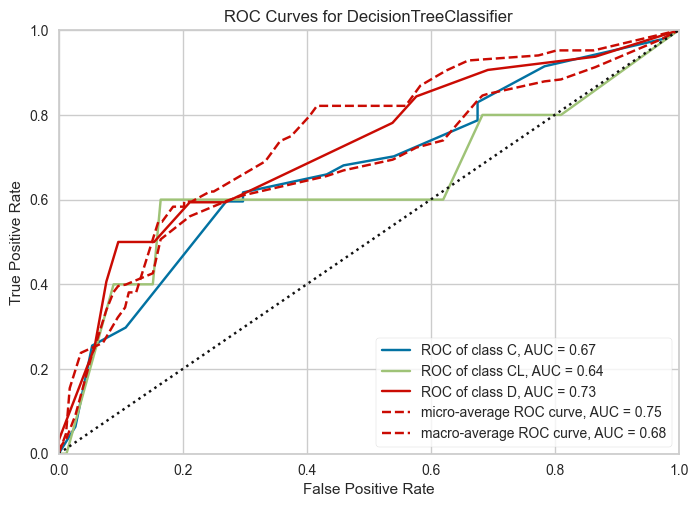

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(ccp_alpha=0.005984555984555988,
                                        random_state=0))

In [86]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(tree_models[best_model_index], X_test,y_test, ax=plt.subplot())

## Support Vector Machine - SVM

In [87]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=33)
svm.fit(X_train, y_train)

SVC(random_state=33)


Average Cross-Validation Scores:
Precision_macro - Train: 0.899, Test: 0.838
Recall_macro - Train: 0.900, Test: 0.834
Accuracy - Train: 0.900, Test: 0.834
F1_macro - Train: 0.899, Test: 0.832

Classification Report:
              precision    recall  f1-score   support

           C       0.78      0.76      0.77       185
          CL       0.89      0.94      0.91       185
           D       0.83      0.81      0.82       185

    accuracy                           0.83       555
   macro avg       0.83      0.83      0.83       555
weighted avg       0.83      0.83      0.83       555


Confusion Matrix:


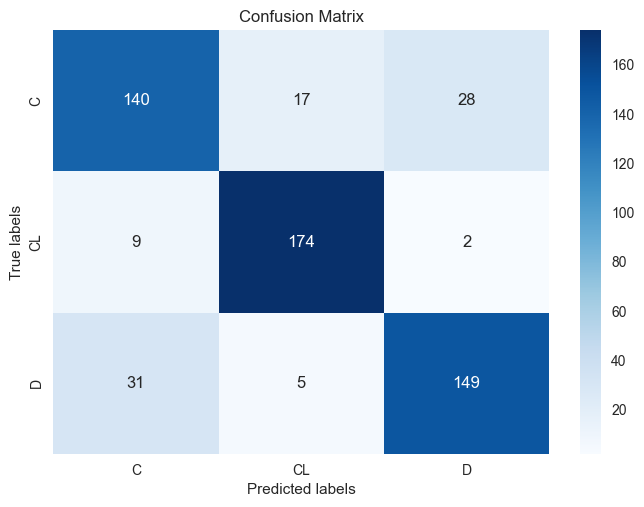

In [88]:
evaluate_model(svm, X_train, y_train)


Test Classification Report:
              precision    recall  f1-score   support

           C       0.82      0.66      0.73        47
          CL       0.13      0.40      0.20         5
           D       0.71      0.69      0.70        32

    accuracy                           0.65        84
   macro avg       0.55      0.58      0.54        84
weighted avg       0.73      0.65      0.69        84


Test Confusion Matrix:


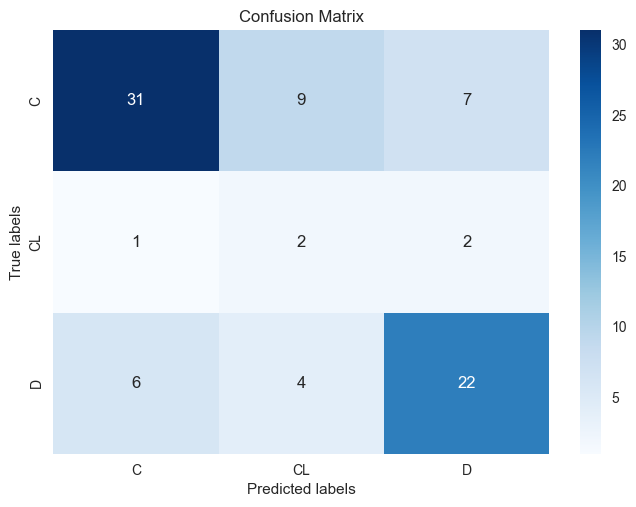

In [89]:
results_df = save_results(svm, X_test, y_test, 'SVM', results_df)
evaluate_final_model(svm, X_test, y_test)

/Users/pau/Desktop/2n/IAA/lab/IAA-practica/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


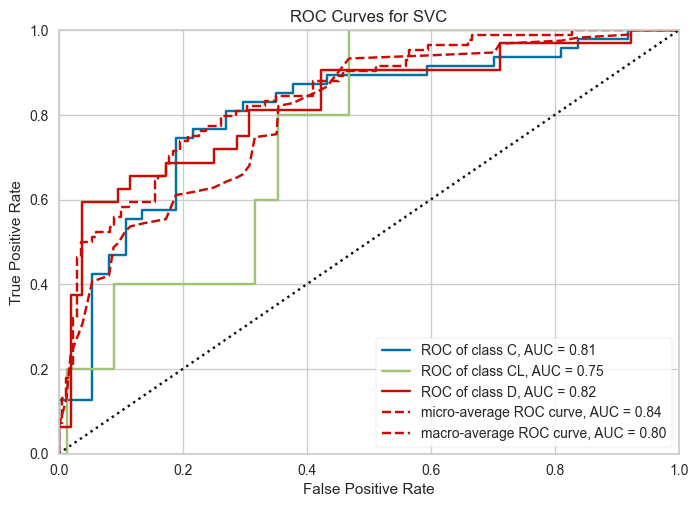

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=SVC(random_state=33))

In [90]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(svm, X_test,y_test, ax=plt.subplot())

In [91]:
results_df

test acc  precision score (W)  recall score (W)  f1 score (W)
KNN            0.547619             0.684559          0.547619      0.599777
Decision Tree  0.595238             0.641766          0.595238      0.613212
SVM            0.654762             0.734743          0.654762      0.686090

## BONUS 1 - Explainable Boosting Machine (EBM)

In [92]:
# install interpret if not already installed
try:
    import interpret
except ModuleNotFoundError:
    !pip install --quiet interpret

In [93]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import GridSearchCV

"""param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_bins': [128, 256, 512]
}

ebm = ExplainableBoostingClassifier(interactions=0, random_state=33)

grid_search = GridSearchCV(ebm, param_grid, cv=10, scoring='f1_macro')

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)"""


'param_grid = {\n    \'learning_rate\': [0.01, 0.1, 1],\n    \'max_bins\': [128, 256, 512]\n}\n\nebm = ExplainableBoostingClassifier(interactions=0, random_state=33)\n\ngrid_search = GridSearchCV(ebm, param_grid, cv=10, scoring=\'f1_macro\')\n\ngrid_search.fit(X_train, y_train)\n\nprint("Best parameters: ", grid_search.best_params_)'

In [94]:
ebm = ExplainableBoostingClassifier(learning_rate=0.1, max_bins=512, interactions=0, random_state=33)

ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(interactions=0, learning_rate=0.1, max_bins=512,
                              random_state=33)


Average Cross-Validation Scores:
Precision_macro - Train: 0.913, Test: 0.775
Recall_macro - Train: 0.913, Test: 0.768
Accuracy - Train: 0.913, Test: 0.768
F1_macro - Train: 0.912, Test: 0.764

Classification Report:
              precision    recall  f1-score   support

           C       0.71      0.71      0.71       185
          CL       0.81      0.88      0.84       185
           D       0.78      0.71      0.75       185

    accuracy                           0.77       555
   macro avg       0.77      0.77      0.77       555
weighted avg       0.77      0.77      0.77       555


Confusion Matrix:


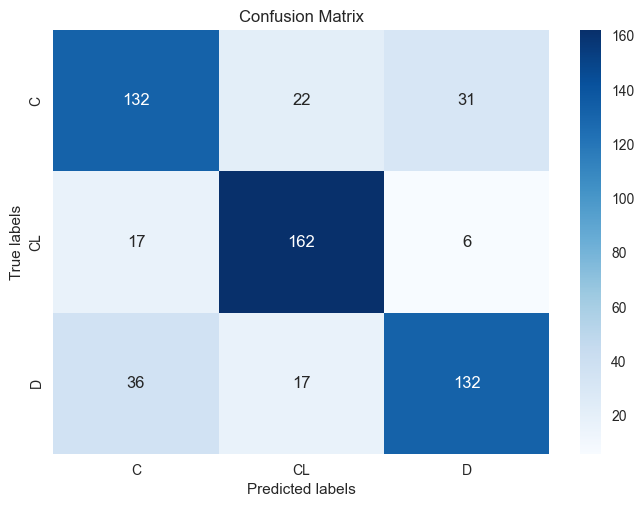

In [95]:
evaluate_model(ebm, X_train, y_train)

In [96]:
from interpret import show
ebm_global = ebm.explain_global(name='EBM')
#show(ebm_global)


Test Classification Report:
              precision    recall  f1-score   support

           C       0.84      0.66      0.74        47
          CL       0.17      0.40      0.24         5
           D       0.71      0.78      0.75        32

    accuracy                           0.69        84
   macro avg       0.57      0.61      0.57        84
weighted avg       0.75      0.69      0.71        84


Test Confusion Matrix:


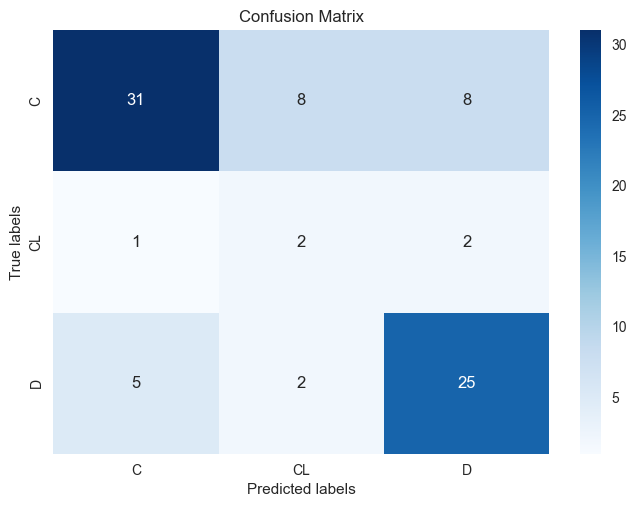

In [97]:
results_df = save_results(ebm, X_test, y_test, 'EBM', results_df)
evaluate_final_model(ebm, X_test, y_test)

In [98]:
ebm_local = ebm.explain_local(X_test, y_test, name='EBM')
#show(ebm_local, 0)

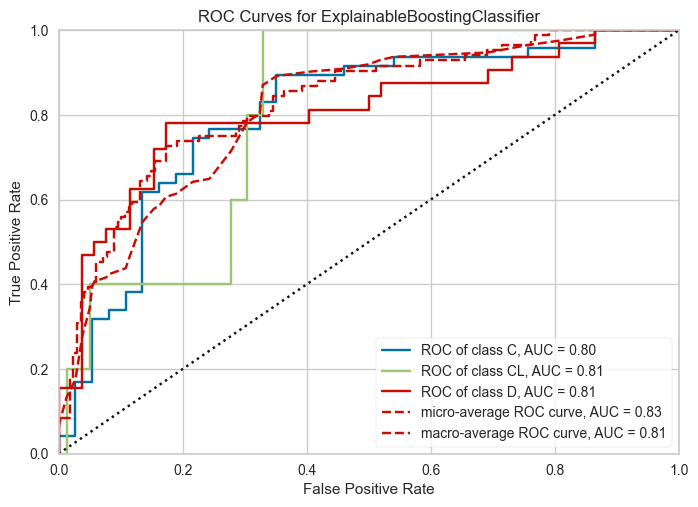

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for ExplainableBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=ExplainableBoostingClassifier(interactions=0,
                                               learning_rate=0.1, max_bins=512,
                                               random_state=33))

In [99]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(ebm, X_test,y_test, ax=plt.subplot())

In [100]:
results_df

test acc  precision score (W)  recall score (W)  f1 score (W)
KNN            0.547619             0.684559          0.547619      0.599777
Decision Tree  0.595238             0.641766          0.595238      0.613212
SVM            0.654762             0.734743          0.654762      0.686090
EBM            0.690476             0.750820          0.690476      0.711280

## BONUS 2 - Clustering

We will use df_encoded, as it has categorical features encoded and all outliers have been already dropped

In [101]:
df_original.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [102]:
df_clustering = df_original.copy()

In [103]:
numerical_columns, categorical_columns = classify_features(df_clustering, 10, 'Status')

In [104]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_imputed = imputer.fit_transform(df_clustering[numerical_columns])

df_imputed = pd.DataFrame(df_imputed, columns=numerical_columns)

df_clustering[numerical_columns] = df_imputed

In [105]:
def impute_categorical_proportional(df, feature):
    np.random.seed(33)
    freq_dist = df[feature].value_counts(normalize=True)
    missing = df[feature].isnull()
    df.loc[missing, feature] = np.random.choice(freq_dist.index, size=sum(missing), p=freq_dist.values)

for feature in categorical_columns:
    impute_categorical_proportional(df_clustering, feature)

In [106]:
df_clustering = one_hot_encode(df_clustering, categorical_columns)

In [107]:
df_before_scaling = df_clustering.copy()

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_clustering[numerical_columns] = scaler.fit_transform(df_clustering[numerical_columns])

In [109]:
df_clustering.drop('Status', axis=1, inplace=True)

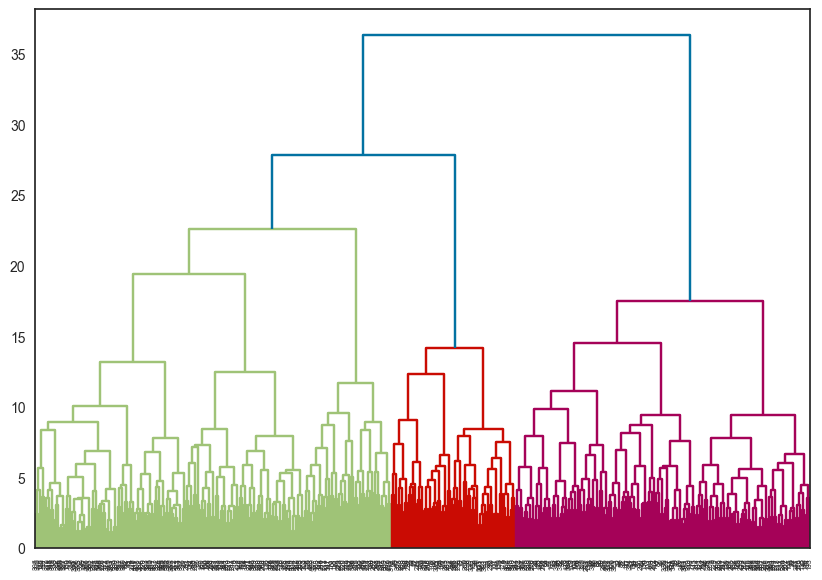

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_style("white")

linked = linkage(df_clustering, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

#plt.savefig('./plots/dendrogram.png')
plt.show()

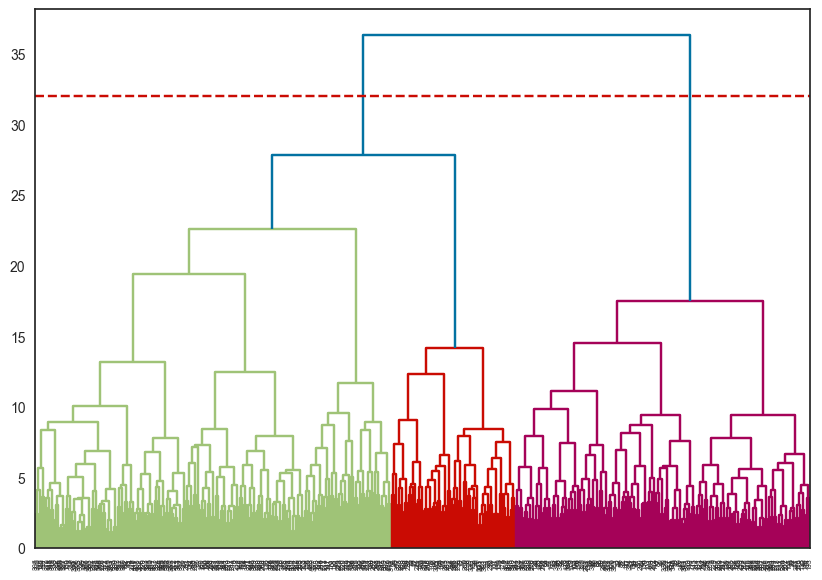

In [111]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.axhline(y=32, color='r', linestyle='--')  
#plt.savefig('./plots/dendrogram_threshold.png')
plt.show()


In [112]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

clusters = fcluster(linked, 2, criterion='maxclust')

df_before_scaling['Cluster_Label'] = clusters

# Anàlisi de clústers per a les columnes numèriques
for cluster in [1, 2]:
    print(f'Estadístiques del Clúster {cluster} per a columnes numèriques:')
    estadístiques = df_before_scaling[df_before_scaling['Cluster_Label'] == cluster][numerical_columns].describe()
    estadístiques_relevants = estadístiques.loc[['mean', 'std', 'min', 'max']]
    print(estadístiques_relevants)


Estadístiques del Clúster 1 per a columnes numèriques:
           N_Days        Age  Bilirubin  Cholesterol   Albumin      Copper  \
mean  2749.993711  48.176101   1.021258   298.143396  3.729711   54.832704   
std    975.337874   9.854341   0.714273    83.080111  0.321185   34.978575   
min    198.000000  28.000000   0.300000   120.000000  2.890000    9.000000   
max   4795.000000  75.000000   5.400000   604.000000  4.520000  227.000000   

         Alk_Phos        SGOT  Tryglicerides   Platelets  Prothrombin  
mean  1135.534591  100.470226      99.813836  279.903145    10.517987  
std    445.082305   37.625148      29.664752   86.652905     0.615192  
min    289.000000   28.380000      46.000000   81.000000     9.000000  
max   2276.000000  232.500000     206.000000  493.000000    12.300000  
Estadístiques del Clúster 2 per a columnes numèriques:
           N_Days        Age  Bilirubin  Cholesterol   Albumin      Copper  \
mean  1406.888031  51.594595   2.571429   330.413127  3.38075

In [113]:
categorical_columns = df_clustering.columns[~df_clustering.columns.isin(numerical_columns)]

In [114]:
import pandas as pd

data = []

for col in categorical_columns:
    mean_cluster1 = df_before_scaling[df_before_scaling['Cluster_Label'] == 1][col].mean()
    std_cluster1 = df_before_scaling[df_before_scaling['Cluster_Label'] == 1][col].std()
    mean_cluster2 = df_before_scaling[df_before_scaling['Cluster_Label'] == 2][col].mean()
    std_cluster2 = df_before_scaling[df_before_scaling['Cluster_Label'] == 2][col].std()

    data.append({'Feature': col, 
                 'Mean_Cluster1': mean_cluster1, 
                 'Std_Cluster1': std_cluster1, 
                 'Mean_Cluster2': mean_cluster2, 
                 'Std_Cluster2': std_cluster2})

estadístiques_categòriques = pd.DataFrame(data)

estadístiques_categòriques


Feature  Mean_Cluster1  Std_Cluster1  Mean_Cluster2  \
0   Drug_D-penicillamine       0.477987      0.501093       0.540541   
1           Drug_Placebo       0.522013      0.501093       0.459459   
2                  Sex_F       0.924528      0.264986       0.876448   
3                  Sex_M       0.075472      0.264986       0.123552   
4              Ascites_N       0.962264      0.191159       0.891892   
5              Ascites_Y       0.037736      0.191159       0.108108   
6         Hepatomegaly_N       0.704403      0.457753       0.335907   
7         Hepatomegaly_Y       0.295597      0.457753       0.664093   
8              Spiders_N       0.817610      0.387386       0.644788   
9              Spiders_Y       0.182390      0.387386       0.355212   
10               Edema_N       0.930818      0.254566       0.795367   
11               Edema_S       0.062893      0.243538       0.131274   
12               Edema_Y       0.006289      0.079305       0.073359   
13             Stage_1.0       0.113208      0.317847       0.011583   
14             Stage_2.0       0.396226      0.490658       0.115830   
15             Stage_3.0       0.339623      0.475077       0.401544   
16             Stage_4.0       0.150943      0.359125       0.471042   

    Std_Cluster2  
0       0.499319  
1       0.499319  
2       0.329707  
3       0.329707  
4       0.311118  
5       0.311118  
6       0.473221  
7       0.473221  
8       0.479504  
9       0.479504  
10      0.404214  
11      0.338354  
12      0.261230  
13      0.107206  
14      0.320641  
15      0.491160  
16      0.500127

/Users/pau/Desktop/2n/IAA/lab/IAA-practica/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


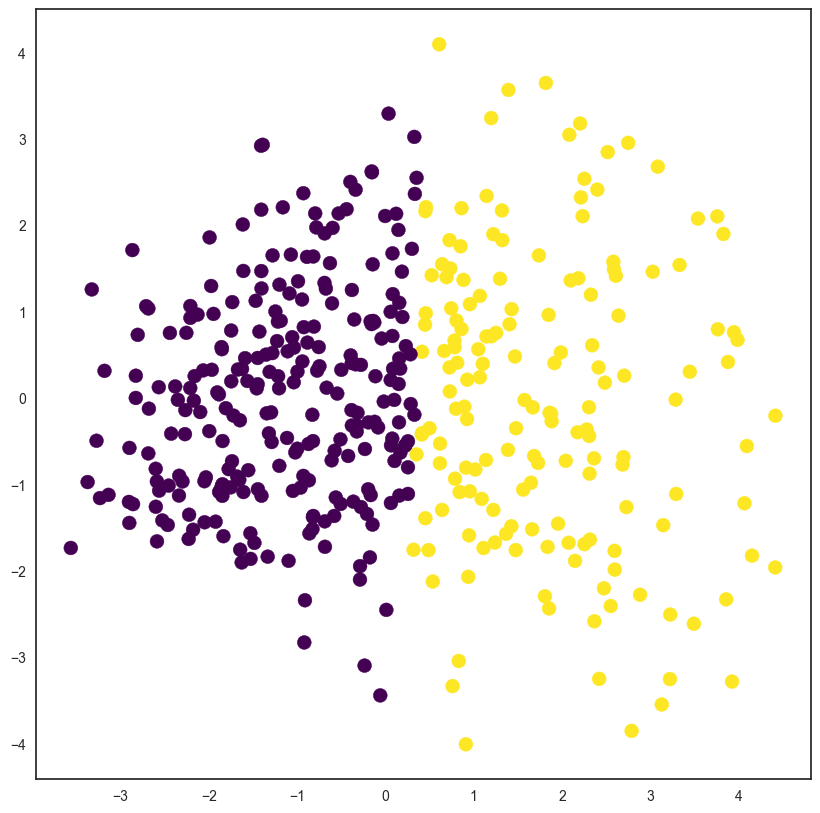

In [115]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#  PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_clustering)

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(principalComponents)

df_clustering['Cluster'] = kmeans.labels_

plt.figure(figsize=(10,10))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=df_clustering['Cluster'], s=100, cmap='viridis')
#plt.savefig('./plots/pca_clusters.png')
plt.show()

In [116]:
from sklearn.decomposition import PCA

X = df_clustering.drop(['Cluster'], axis=1)

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X)

components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

for i, (pc, explained_var) in enumerate(zip(components, explained_variance_ratio), start=1):
    print(f"\nComponent Principal {i} - Explained Variance Ratio: {explained_var:.4f}")
    top_variables_idx = pc.argsort()[::-1][:5]  # Pots ajustar el nombre de variables a mostrar (en aquest cas, 5)
    top_variables = X.columns[top_variables_idx]
    print(f"Top Variables: {', '.join(top_variables)}")



Component Principal 1 - Explained Variance Ratio: 0.2232
Top Variables: Bilirubin, Copper, SGOT, Prothrombin, Alk_Phos

Component Principal 2 - Explained Variance Ratio: 0.1485
Top Variables: Cholesterol, Alk_Phos, Platelets, SGOT, Albumin
